# Regressão Linear Múltipla

O objetivo deste notebook é explorar a regressão múltipla e engenharia de atributos com as funções da API Scikit-learn.

Neste notebook você irá manipular dados de transações imobiliárias de King County para prever preços usando regressão múltipla. Desta forma, você poderá:
* Usar Pandas DataFrames para realizar algumas atividades de engenharia de atributos
* Usar funções do Scikit-learn para computar os coeficientes de regressão (pesos/parâmetros)
* Dados os coeficientes de regressão, os preditores e a saída (preços), criar uma função para computar erro utilizando a técnica de mínimos quadrados (Residual Sum of Squares).
* Visualizar os coeficientes e interpretar seus significados

## Importação das bibliotecas

Importação de bibliotecas necessárias para a execução dos comandos:
* Pandas: para manipulação dos dados
* Numpy: para compatibilizar o uso de dados por algumas funções
* Datetime: para formatar um dos atributos da base de dados
* Sklearn: para uso comparativo de funções de regressão linear

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import DataFrame
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import RobustScaler, StandardScaler, LabelEncoder, MinMaxScaler, MaxAbsScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
import xgboost as xgb
#from catboost import CatBoostRegressor
from numpy import mean
from numpy import std

### Leitura dos dados

O dataset contém dados de transações imobiliárias de King County, região aonde está a cidade de Seattle, USA.

In [3]:
sales = pd.read_csv("kc_house_data.csv")

## Análise Exploratória dos Dados - Exploratory Data Analysis (EDA) e Pré-processamento

Antes de criarmos o modelo de regressão, vamos primeiro explorar os dados:
* Por meio do uso de algumas funções nativas do Pandas (**.info()** e **.describe()**) é possível extrair uma visão geral dos atributos do dataset;
    * A função *info()* retorna informações específicas sobre os tipos de dados de cada um dos atributos, além de informações sobre uso de memória pela estrutura do mesmo;
    * A função *describe()* retorna informações estatísticas em geral referentes aos dados de cada atributo.

In [4]:
sales

id             date     price  bedrooms  bathrooms  \
0      7129300520  20141013T000000  221900.0         3       1.00   
1      6414100192  20141209T000000  538000.0         3       2.25   
2      5631500400  20150225T000000  180000.0         2       1.00   
3      2487200875  20141209T000000  604000.0         4       3.00   
4      1954400510  20150218T000000  510000.0         3       2.00   
...           ...              ...       ...       ...        ...   
21608   263000018  20140521T000000  360000.0         3       2.50   
21609  6600060120  20150223T000000  400000.0         4       2.50   
21610  1523300141  20140623T000000  402101.0         2       0.75   
21611   291310100  20150116T000000  400000.0         3       2.50   
21612  1523300157  20141015T000000  325000.0         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
0             1180      5650     1.0           0     0  ...      7   
1             2570      7242     2.0           0     0  ...      7   
2              770     10000     1.0           0     0  ...      6   
3             1960      5000     1.0           0     0  ...      7   
4             1680      8080     1.0           0     0  ...      8   
...            ...       ...     ...         ...   ...  ...    ...   
21608         1530      1131     3.0           0     0  ...      8   
21609         2310      5813     2.0           0     0  ...      8   
21610         1020      1350     2.0           0     0  ...      7   
21611         1600      2388     2.0           0     0  ...      8   
21612         1020      1076     2.0           0     0  ...      7   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
0            1180              0      1955             0    98178  47.5112   
1            2170            400      1951          1991    98125  47.7210   
2             770              0      1933             0    98028  47.7379   
3            1050            910      1965             0    98136  47.5208   
4            1680              0      1987             0    98074  47.6168   
...           ...            ...       ...           ...      ...      ...   
21608        1530              0      2009             0    98103  47.6993   
21609        2310              0      2014             0    98146  47.5107   
21610        1020              0      2009             0    98144  47.5944   
21611        1600              0      2004             0    98027  47.5345   
21612        1020              0      2008             0    98144  47.5941   

          long  sqft_living15  sqft_lot15  
0     -122.257           1340        5650  
1     -122.319           1690        7639  
2     -122.233           2720        8062  
3     -122.393           1360        5000  
4     -122.045           1800        7503  
...        ...            ...         ...  
21608 -122.346           1530        1509  
21609 -122.362           1830        7200  
21610 -122.299           1020        2007  
21611 -122.069           1410        1287  
21612 -122.299           1020        1357  

[21613 rows x 21 columns]

In [5]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
sales.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517      0.766318      0.650743   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068800e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21613.000000  21613.000000   21613.000000  21613.000000  21613.000000   
mean       7.656873   1788.390691     291.509045   1971.005136     84.402258   
std        1.175459    828.090978     442.575043     29.373411    401.679240   
min        1.000000    290.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     560.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21613.000000  21613.000000  21613.000000   21613.000000   21613.000000  
mean   98077.939805     47.560053   -122.213896    1986.552492   12768.455652  
std       53.505026      0.138564      0.140828     685.391304   27304.179631  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471000   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.230000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

#### Eliminação manual de atributos que direta ou indiretamente não contribuem para o modelo

Remoção dos atributos *'id' e 'date'*

In [7]:
sales.drop(['id'],axis=1,inplace=True)
sales.drop(['date'],axis=1,inplace=True)

#### Verificação de quantos objetos contém valor igual a ZERO para cada um dos parâmetros
Esta análise indica, de imediato, uma "luz vermelha" que devemos considerar quanto aos parâmetros **waterfront**, **view**, **yr_renovated** e **sqft_basement**. 
* Quase todos os parâmetros contém aproximadamente **90%** ou mais de seus dados com valor igual a zero.

In [8]:
(sales[sales[sales.columns] == 0]).count()

price                0
bedrooms            13
bathrooms           10
sqft_living          0
sqft_lot             0
floors               0
waterfront       21450
view             19489
condition            0
grade                0
sqft_above           0
sqft_basement    13126
yr_built             0
yr_renovated     20699
zipcode              0
lat                  0
long                 0
sqft_living15        0
sqft_lot15           0
dtype: int64

#### Verificação de quantos valores únicos cada atributo possui
Esta verificação foi realizada para se ter uma visão geral dos intervalos de valores que cada atributo apresenta.

In [9]:
sales.nunique()

price            4028
bedrooms           13
bathrooms          30
sqft_living      1038
sqft_lot         9782
floors              6
waterfront          2
view                5
condition           5
grade              12
sqft_above        946
sqft_basement     306
yr_built          116
yr_renovated       70
zipcode            70
lat              5034
long              752
sqft_living15     777
sqft_lot15       8689
dtype: int64

O comando abaixo identifica os atributos com menor quantidade de valores únicos (<= 30):

In [10]:
observe = []
for col in sales.columns:
    if len(sales[col].unique()) <= 30:
        observe.append(col)
print(observe)

['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade']


Impressão das faixas de valores de cada um dos atributos idenficados acima:

In [11]:
for col in observe:
    print(col, sales[col].unique())

bedrooms [ 3  2  4  5  1  6  7  0  8  9 11 10 33]
bathrooms [1.   2.25 3.   2.   4.5  1.5  2.5  1.75 2.75 3.25 4.   3.5  0.75 4.75
 5.   4.25 3.75 0.   1.25 5.25 6.   0.5  5.5  6.75 5.75 8.   7.5  7.75
 6.25 6.5 ]
floors [1.  2.  1.5 3.  2.5 3.5]
waterfront [0 1]
view [0 3 4 2 1]
condition [3 5 4 1 2]
grade [ 7  6  8 11  9  5 10 12  4  3 13  1]


In [12]:
sales[sales['bedrooms'] == 33]

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
15870  640000.0        33       1.75         1620      6000     1.0   

       waterfront  view  condition  grade  sqft_above  sqft_basement  \
15870           0     0          5      7        1040            580   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
15870      1947             0    98103  47.6878 -122.331           1330   

       sqft_lot15  
15870        4700

Substituição de valor discrepante (outlier) contido em um dos objetos (linha nº 15870) do dataset para o número de quartos. O valor foi substituído pela média de todas as casas com o preço igual ao desta casa.

In [13]:
sales['bedrooms'] = sales['bedrooms'].replace([33], int(sales[sales['price'] == 640000]['bedrooms'].mean()))

Especificação dos atributos para impressão de gráficos com fins de análise dos mesmos. A remoção do atributo "date" foi feita para não gerar erro ao plotar os gráficos.

In [14]:
columns = sales.columns.tolist()
#columns.remove('price')

### Histogramas

Um histograma é uma espécie de gráfico de barras que demonstra uma distribuição de frequências. No histograma, a base de cada uma das barras representa uma classe e a altura representa a quantidade ou frequência absoluta com que o valor de cada classe ocorre.

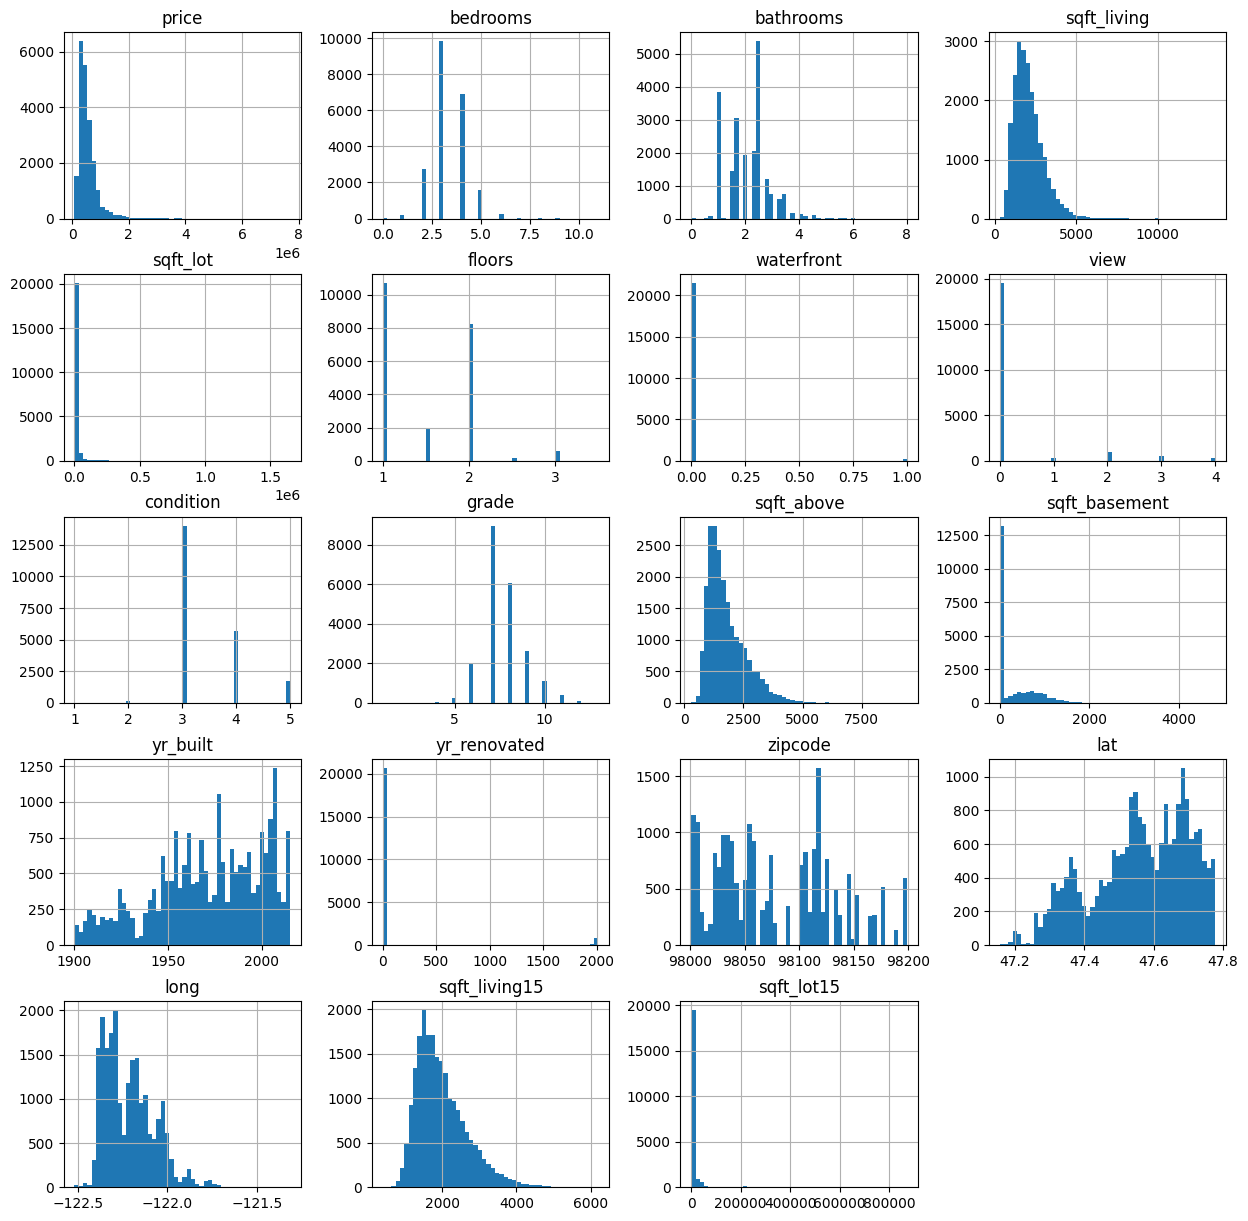

In [15]:
sales[columns].hist(bins=50,figsize=(15,15))
plt.show()

### Gráficos de Dispersão (Scatter Plot)

Os gráficos de dispersão são utilizados para determinar a força de um relacionamento entre duas variáveis numéricas. O eixo-x representa a variável independente e o eixo-y representa a variável dependente.

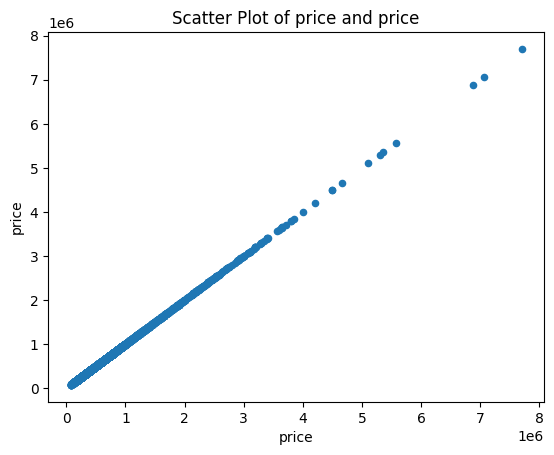

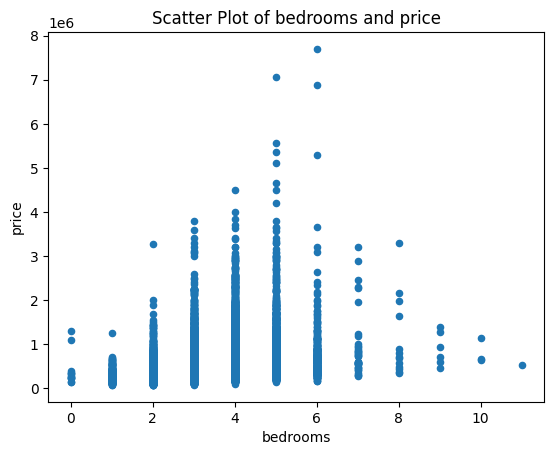

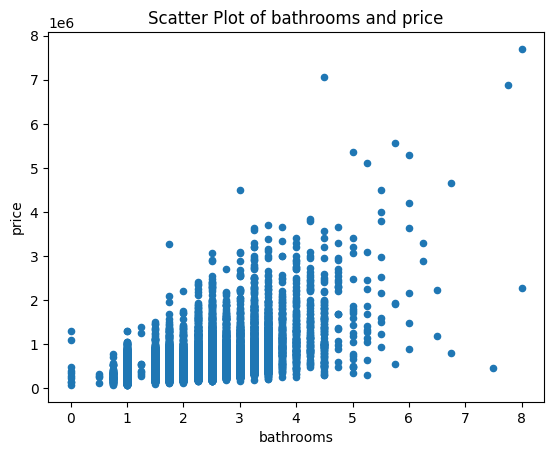

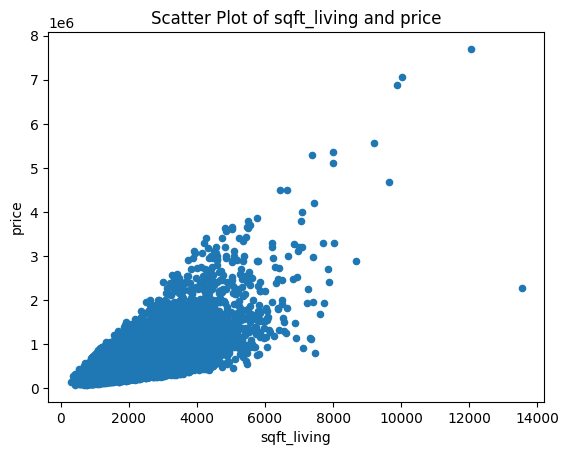

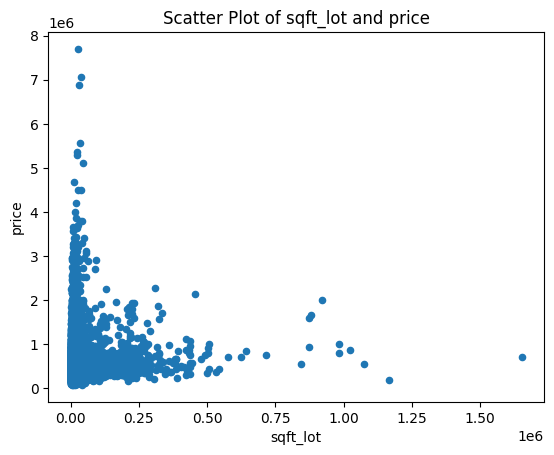

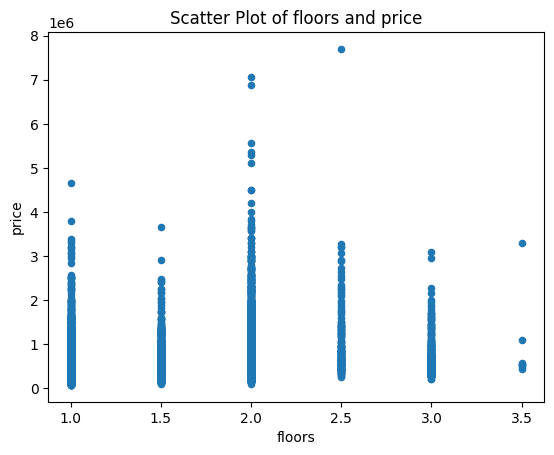

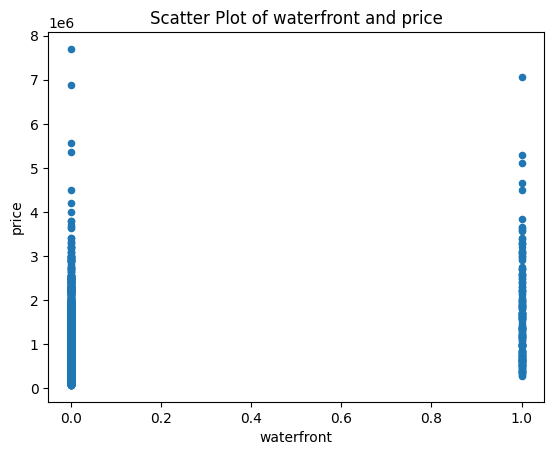

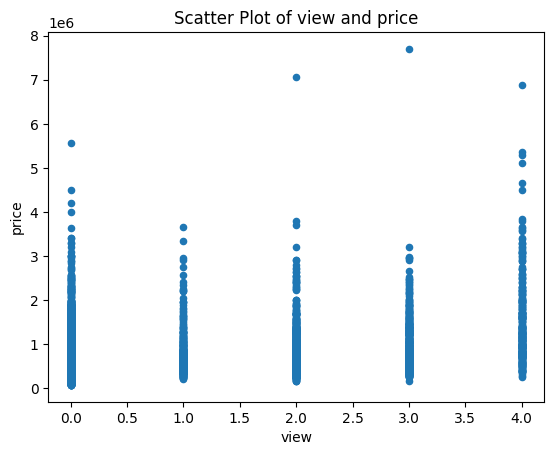

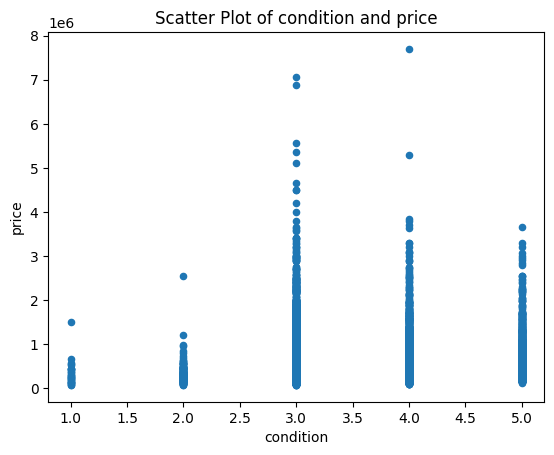

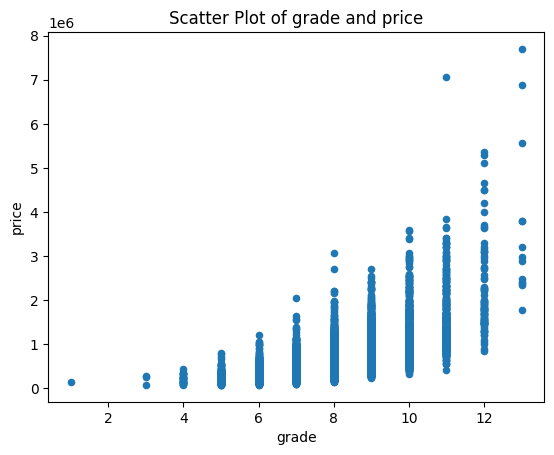

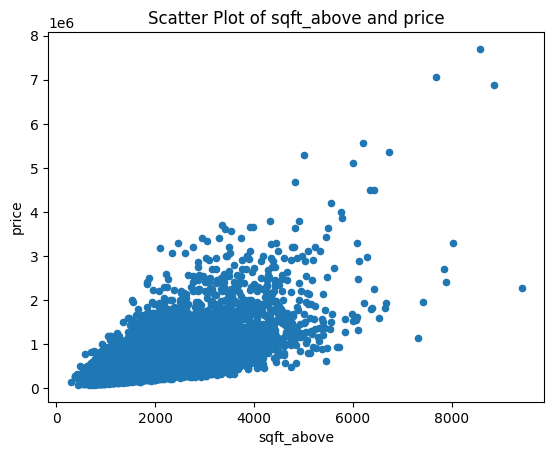

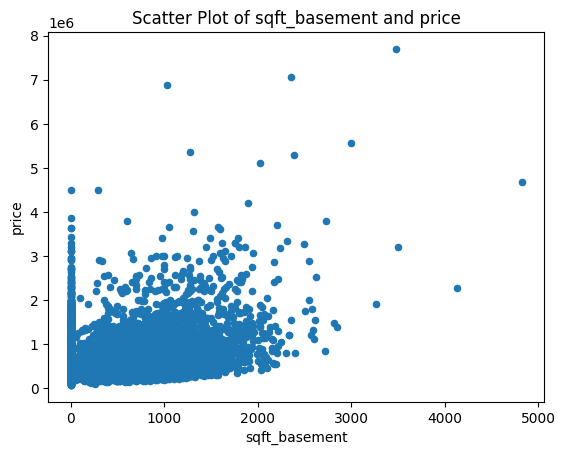

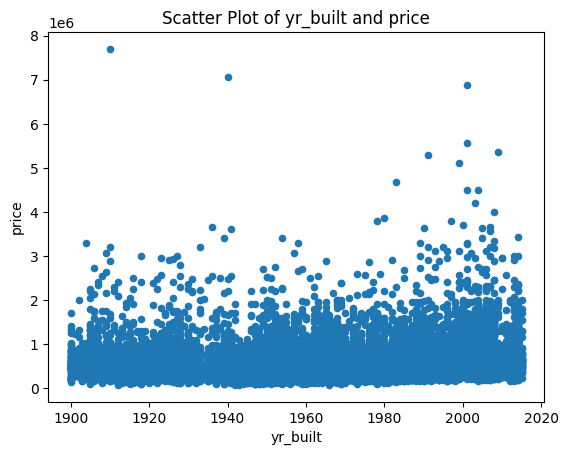

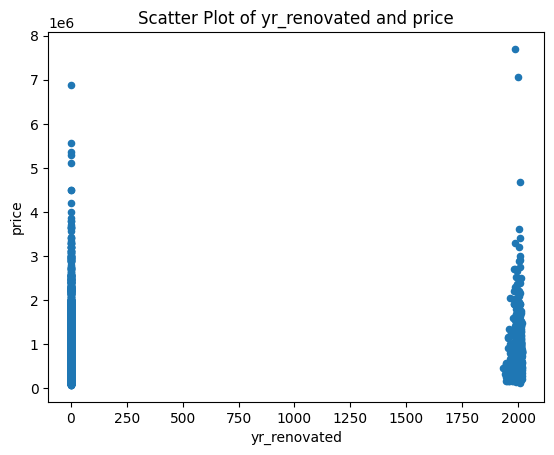

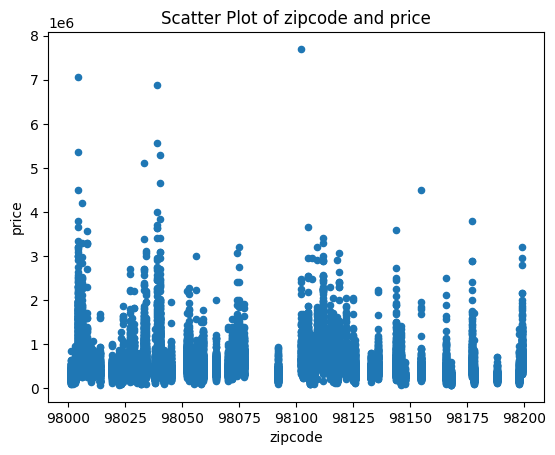

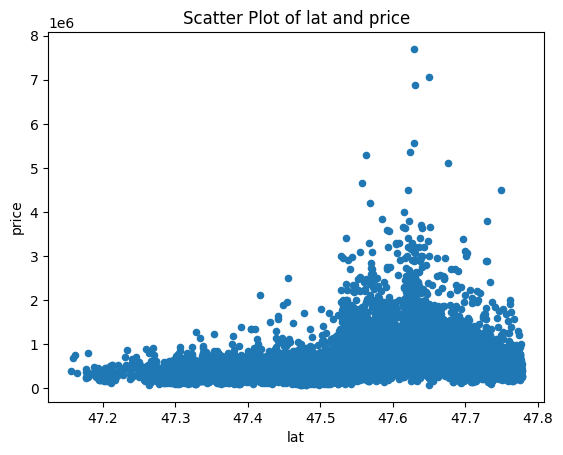

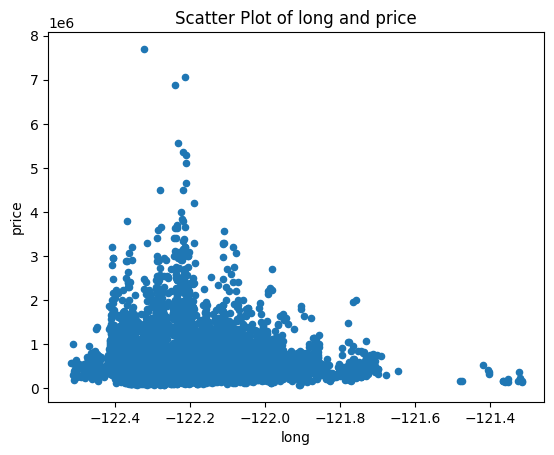

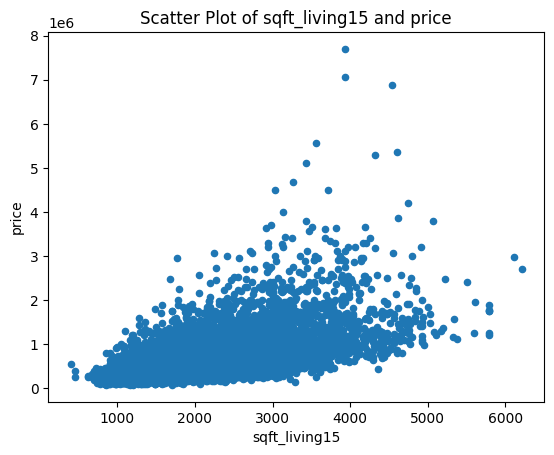

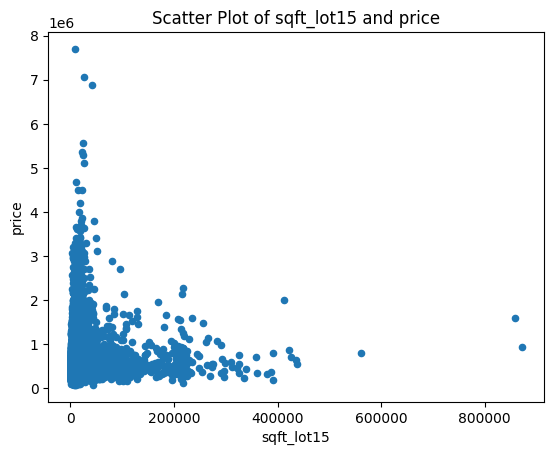

In [16]:
for col in sales[columns]:
    sales.plot.scatter(x=col, y='price', title='Scatter Plot of '+ col + ' and price');

### Boxplots

O boxplot é uma ferramenta gráfica para representar a variação de dados observados de uma variável numérica por meio de quartis. Este tipo de gráfico permite visualizar rapidamente a distribuição de valores em um conjunto de dados e ver onde estão localizadas as cinco estatísticas de resumo numéricos. Outro ponto importante a ser observado é que o boxplot nos dá um indicativo da existência e o volume de **outliers**, caso existam.

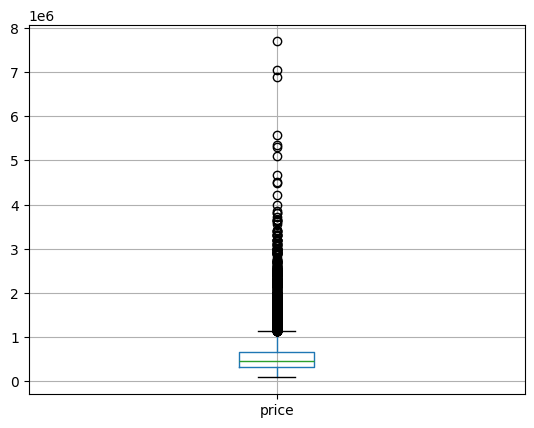

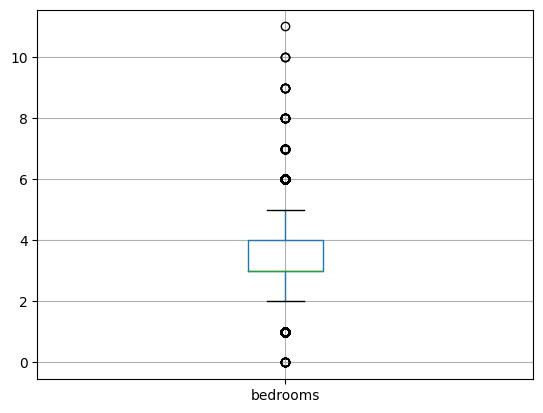

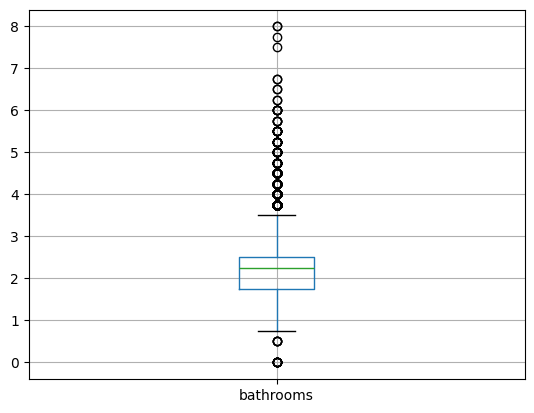

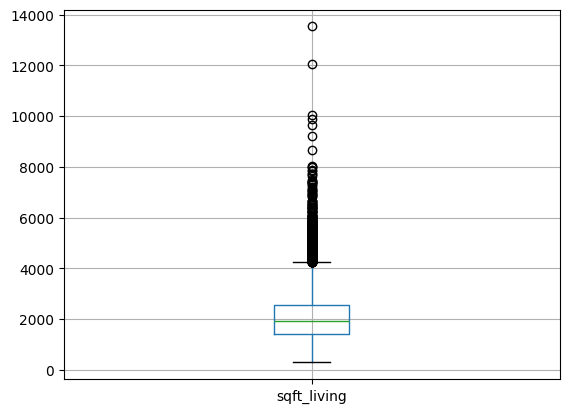

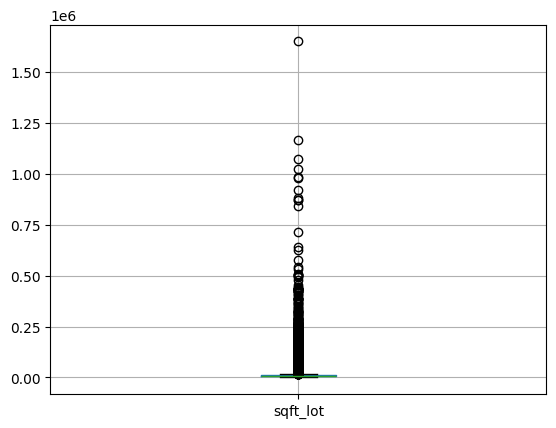

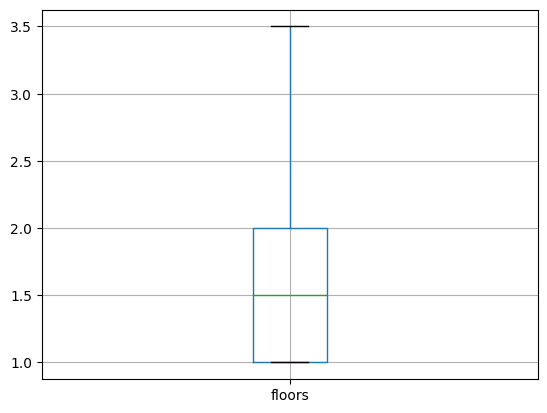

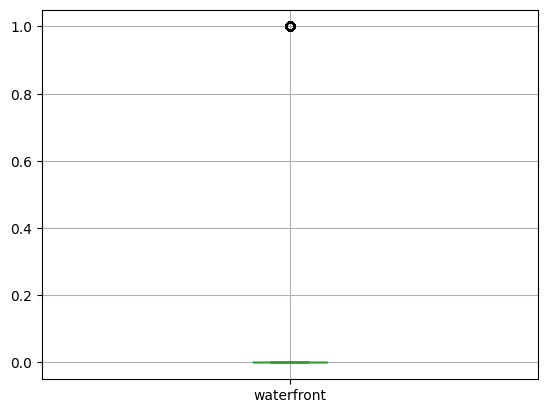

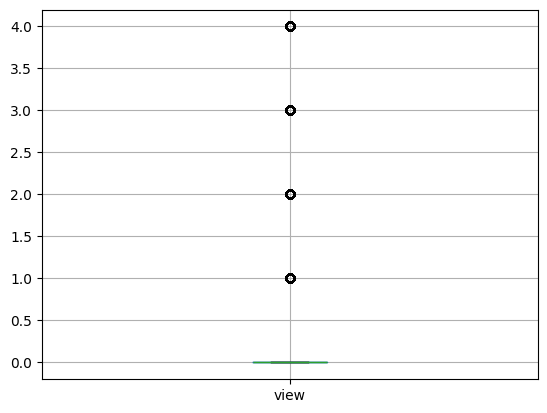

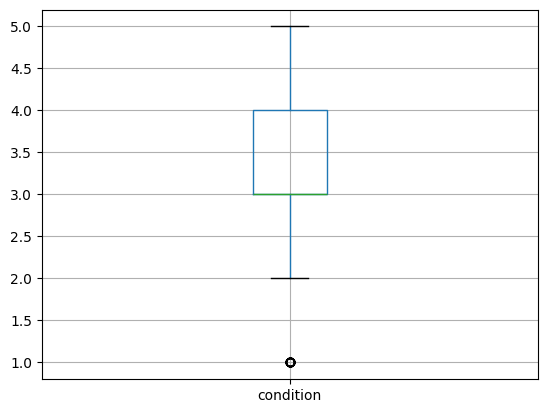

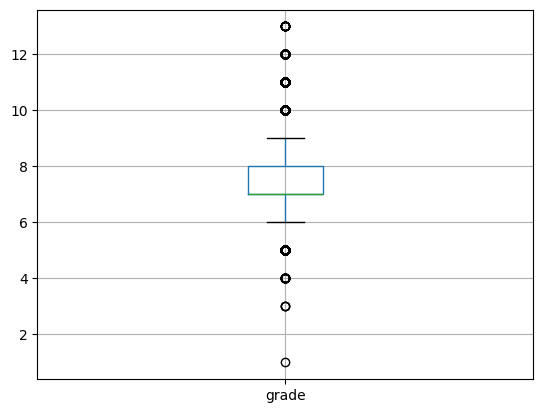

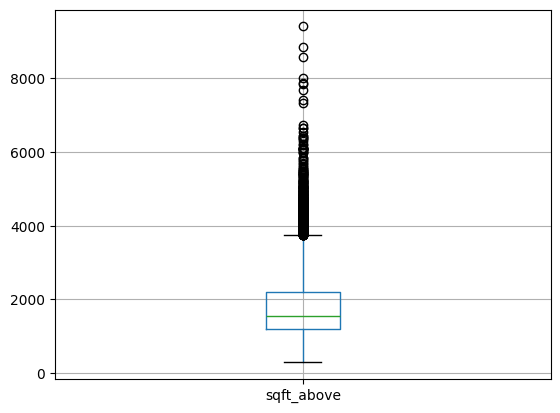

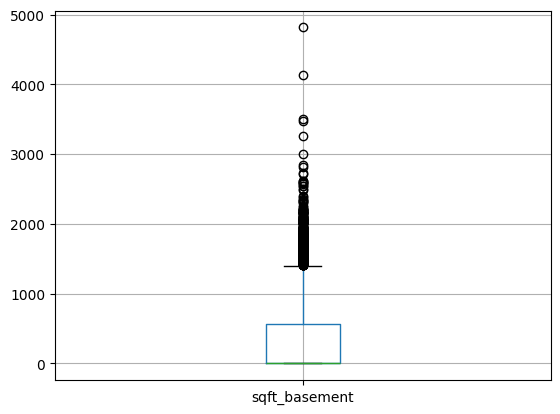

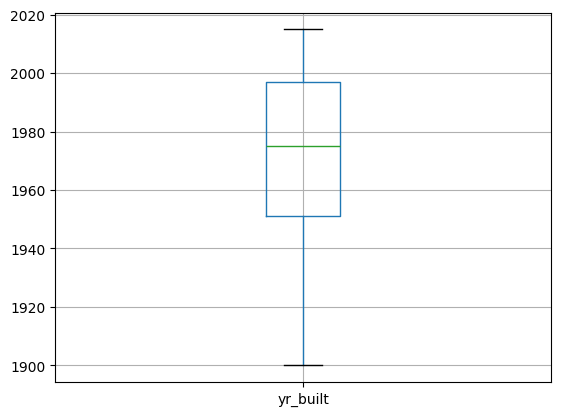

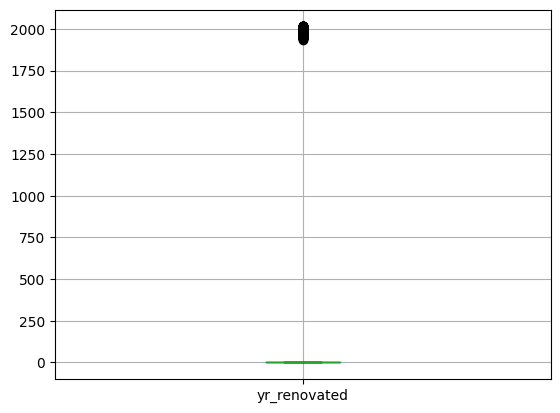

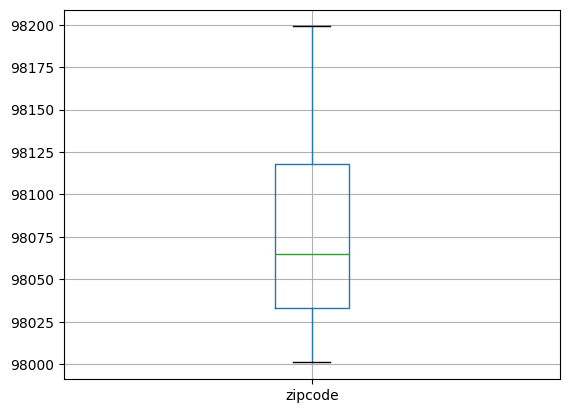

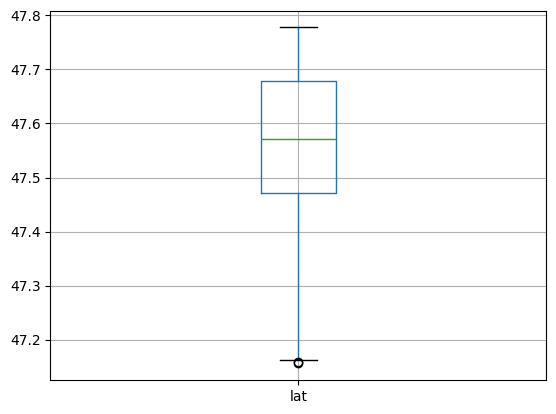

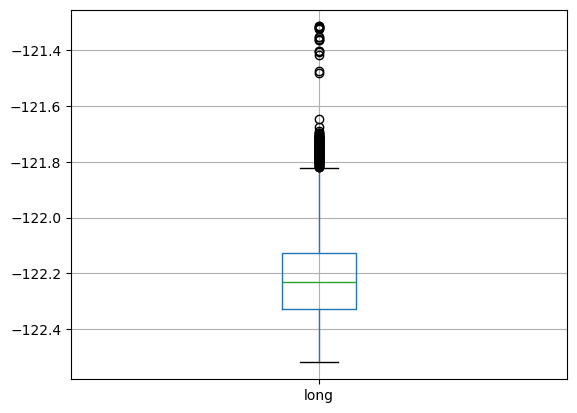

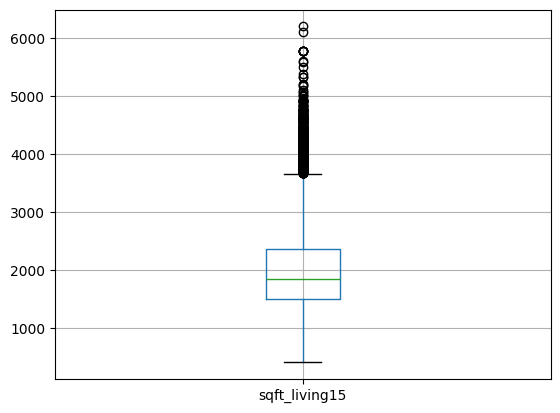

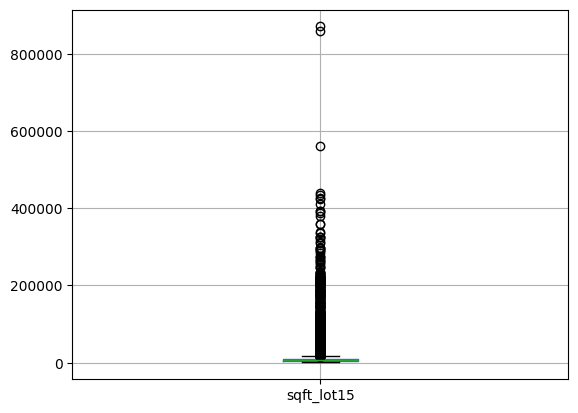

In [17]:
for col in columns:
    sales[columns].boxplot(column=col)
    plt.show()

## Covariância, Correlação e Colinearidade

### Variância e Covariância
Quando medimos o spread da distribuição de alguma variável aleatória X, calculamos a variância e o desvio padrão, como:

![alt text](fig/fig1.png "Variância")


A variação entre X e Y é chamada de covariância. Para encontrar a covariância de X e Y, usamos a mesma abordagem acima:

![alt text](fig/fig2.png "Covariância")

Portanto, a covariância de X e Y pode ser negativa ou positiva. Como a covariância não é normalizada, ela apenas descreve uma tendência entre duas variáveis.

### Correlação e Colinearidade
Para medir a força da tendência, precisamos normalizar a covariância. Assim, a covariância normalizada pelos desvios padrão de X e Y é um coeficiente de correlação (ou coeficiente de correlação de Pearson), que é definido abaixo:

![alt text](fig/fig3.png "Coeficiente de correlação")

Assim, os valores do coeficiente de correlação estão entre -1 e +1.
Para classificar a força da correlação, os seguintes intervalos são comumente usados:

![alt text](fig/fig4.png "Classificação da força de correlação")

Sinais positivos e negativos indicam a tendência da correlação.

Quando duas variáveis ​​estão fortemente correlacionadas entre si, elas são colineares. Se houver correlações fortes com múltiplas variáveis, é multicolinearidade.

### Por que esse poderia ser um problema?

* A colinearidade tende a inflacionar a variância de pelo menos um coeficiente de regressão estimado.

* Isto pode fazer com que pelo menos alguns coeficientes de regressão tenham sinais errados.

Maneiras de lidar com a colinearidade

* Ignore se a previsão dos valores de y for o objeto do seu estudo, então a colinearidade não será um problema.

* Livre-se das variáveis **redundantes** usando a técnica de seleção de variáveis.

Existem múltiplas técnicas para selecionar variáveis que estão menos correlacionadas mas com alta importância

1. Método de correlação

2. PCA (Análise de Componentes Principais)

3. SVD (Decomposição de Valor Singular)

4. Algoritmos de aprendizado de máquina (floresta randômica, árvores de decisão)

### Por quê esse não deve ser considerado um problema neste caso?

* A colinearidade afeta apenas a variância das estimativas dos coeficientes e dos valores dos coefientes de correlação. Desta forma, ela afeta a interpretabilidade do modelo mas, não a capacidade de previsão do modelo.

* Portanto, se o objetivo é construir um modelo de regressão para fazer previsões e não precisa entender a influência de cada variável independente, não é necessário se preocupar com a colinearidade do modelo.

In [18]:
sales[columns].cov()

price       bedrooms      bathrooms   sqft_living  \
price          1.347824e+11  105152.209923  148481.495749  2.367154e+08   
bedrooms       1.051522e+05       0.824411       0.370017  4.932132e+02   
bathrooms      1.484815e+05       0.370017       0.593151  5.338120e+02   
sqft_living    2.367154e+08     493.213155     533.811988  8.435337e+05   
sqft_lot       1.363437e+09    1233.544374    2798.943628  6.574684e+06   
floors         5.090800e+04       0.088768       0.208211  1.755404e+02   
waterfront     8.460643e+03      -0.000520       0.004247  8.249461e+00   
view           1.117730e+05       0.056999       0.110800  2.003143e+02   
condition      8.687030e+03       0.015098      -0.062638 -3.511460e+01   
grade          2.880265e+05       0.391135       0.602005  8.234077e+02   
sqft_above     1.841014e+08     368.840318     437.087555  6.666978e+05   
sqft_basement  5.261406e+07     124.372837      96.724433  1.768358e+05   
yr_built       5.824484e+05       4.244216      11.447333  8.580238e+03   
yr_renovated   1.864486e+07       7.151933      15.696537  2.042442e+04   
zipcode       -1.045072e+06      -7.630866      -8.400840 -9.800232e+03   
lat            1.561742e+04      -0.001322       0.002622  6.685035e+00   
long           1.118118e+03       0.017115       0.024191  3.107108e+01   
sqft_living15  1.472964e+08     250.532797     300.161076  4.761601e+05   
sqft_lot15     8.264591e+08     753.471274    1833.182173  4.596302e+06   

                   sqft_lot        floors   waterfront           view  \
price          1.363437e+09  50908.003884  8460.643388  111772.969096   
bedrooms       1.233544e+03      0.088768    -0.000520       0.056999   
bathrooms      2.798944e+03      0.208211     0.004247       0.110800   
sqft_living    6.574684e+06    175.540402     8.249461     200.314304   
sqft_lot       1.715659e+09   -116.328567    77.418670    2371.393311   
floors        -1.163286e+02      0.291588     0.001107       0.012184   
waterfront     7.741867e+01      0.001107     0.007485       0.026643   
view           2.371393e+03      0.012184     0.026643       0.587243   
condition     -2.414616e+02     -0.092686     0.000938       0.022934   
grade          5.531997e+03      0.290824     0.008418       0.226383   
sqft_above     6.294462e+06    234.260251     5.163720     106.387032   
sqft_basement  2.802218e+05    -58.719850     3.085741      93.927272   
yr_built       6.458085e+04      7.761250    -0.066483      -1.202897   
yr_renovated   1.271708e+05      1.374814     3.227949      31.987181   
zipcode       -2.871637e+05     -1.708121     0.140191       3.478060   
lat           -4.917661e+02      0.003712    -0.000171       0.000654   
long           1.338837e+03      0.009538    -0.000511      -0.008461   
sqft_living15  4.105319e+06    103.586570     5.127103     147.294289   
sqft_lot15     8.126540e+08   -166.152367    72.529786    1518.526494   

                 condition          grade    sqft_above  sqft_basement  \
price          8687.030331  288026.499738  1.841014e+08   5.261406e+07   
bedrooms          0.015098       0.391135  3.688403e+02   1.243728e+02   
bathrooms        -0.062638       0.602005  4.370876e+02   9.672443e+01   
sqft_living     -35.114601     823.407664  6.666978e+05   1.768358e+05   
sqft_lot       -241.461641    5531.996968  6.294462e+06   2.802218e+05   
floors           -0.092686       0.290824  2.342603e+02  -5.871985e+01   
waterfront        0.000938       0.008418  5.163720e+00   3.085741e+00   
view              0.022934       0.226383  1.063870e+02   9.392727e+01   
condition         0.423467      -0.110664 -8.525727e+01   5.014267e+01   
grade            -0.110664       1.381703  7.358054e+02   8.760226e+01   
sqft_above      -85.257275     735.805403  6.857347e+05  -1.903683e+04   
sqft_basement    50.142673      87.602262 -1.903683e+04   1.958727e+05   
yr_built         -6.908312      15.432403  1.031084e+04  -1.730605e+03   
yr_renovated    -15.8448

In [19]:
sales[columns].corr()

price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
price          1.000000  0.315450   0.525138     0.702035  0.089661  0.256794   
bedrooms       0.315450  1.000000   0.529135     0.591441  0.032800  0.181050   
bathrooms      0.525138  0.529135   1.000000     0.754665  0.087740  0.500653   
sqft_living    0.702035  0.591441   0.754665     1.000000  0.172826  0.353949   
sqft_lot       0.089661  0.032800   0.087740     0.172826  1.000000 -0.005201   
floors         0.256794  0.181050   0.500653     0.353949 -0.005201  1.000000   
waterfront     0.266369 -0.006614   0.063744     0.103818  0.021604  0.023698   
view           0.397293  0.081919   0.187737     0.284611  0.074710  0.029444   
condition      0.036362  0.025553  -0.124982    -0.058753 -0.008958 -0.263768   
grade          0.667434  0.366478   0.664983     0.762704  0.113621  0.458183   
sqft_above     0.605567  0.490556   0.685342     0.876597  0.183512  0.523885   
sqft_basement  0.323816  0.309504   0.283770     0.435043  0.015286 -0.245705   
yr_built       0.054012  0.159137   0.506019     0.318049  0.053080  0.489319   
yr_renovated   0.126434  0.019610   0.050739     0.055363  0.007644  0.006338   
zipcode       -0.053203 -0.157075  -0.203866    -0.199430 -0.129574 -0.059121   
lat            0.307003 -0.010511   0.024573     0.052529 -0.085683  0.049614   
long           0.021626  0.133852   0.223042     0.240223  0.229521  0.125419   
sqft_living15  0.585379  0.402582   0.568634     0.756420  0.144608  0.279885   
sqft_lot15     0.082447  0.030392   0.087175     0.183286  0.718557 -0.011269   

               waterfront      view  condition     grade  sqft_above  \
price            0.266369  0.397293   0.036362  0.667434    0.605567   
bedrooms        -0.006614  0.081919   0.025553  0.366478    0.490556   
bathrooms        0.063744  0.187737  -0.124982  0.664983    0.685342   
sqft_living      0.103818  0.284611  -0.058753  0.762704    0.876597   
sqft_lot         0.021604  0.074710  -0.008958  0.113621    0.183512   
floors           0.023698  0.029444  -0.263768  0.458183    0.523885   
waterfront       1.000000  0.401857   0.016653  0.082775    0.072075   
view             0.401857  1.000000   0.045990  0.251321    0.167649   
condition        0.016653  0.045990   1.000000 -0.144674   -0.158214   
grade            0.082775  0.251321  -0.144674  1.000000    0.755923   
sqft_above       0.072075  0.167649  -0.158214  0.755923    1.000000   
sqft_basement    0.080588  0.276947   0.174105  0.168392   -0.051943   
yr_built        -0.026161 -0.053440  -0.361417  0.446963    0.423898   
yr_renovated     0.092885  0.103917  -0.060618  0.014414    0.023285   
zipcode          0.030285  0.084827   0.003026 -0.184862   -0.261190   
lat             -0.014274  0.006157  -0.014941  0.114084   -0.000816   
long            -0.041910 -0.078400  -0.106500  0.198372    0.343803   
sqft_living15    0.086463  0.280439  -0.092824  0.713202    0.731870   
sqft_lot15       0.030703  0.072575  -0.003406  0.119248    0.194050   

               sqft_basement  yr_built  yr_renovated   zipcode       lat  \
price               0.323816  0.054012      0.126434 -0.053203  0.307003   
bedrooms            0.309504  0.159137      0.019610 -0.157075 -0.010511   
bathrooms           0.283770  0.506019      0.050739 -0.203866  0.024573   
sqft_living         0.435043  0.318049      0.055363 -0.199430  0.052529   
sqft_lot            0.015286  0.053080      0.007644 -0.129574 -0.085683   
floors             -0.245705  0.489319      0.006338 -0.059121  0.049614   
waterfront          0.080588 -0.026161      0.092885  0.030285 -0.014274   
view                0.276947 -0.053440      0.103917  0.084827  0.006157   
condition           0.174105 -0.361417     -0.060618  0.003026 -0.014941   
grade               0.168392  0.446963      0.014414 -0.184862  0.114084   
sqft_above         -0.051943  0.423898      0.023285 -0.261190 -0.000816   
sqft_basement       1.000000 -0.133124      

In [20]:
abs(sales[columns].corr()) > 0.70

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
price           True     False      False         True     False   False   
bedrooms       False      True      False        False     False   False   
bathrooms      False     False       True         True     False   False   
sqft_living     True     False       True         True     False   False   
sqft_lot       False     False      False        False      True   False   
floors         False     False      False        False     False    True   
waterfront     False     False      False        False     False   False   
view           False     False      False        False     False   False   
condition      False     False      False        False     False   False   
grade          False     False      False         True     False   False   
sqft_above     False     False      False         True     False   False   
sqft_basement  False     False      False        False     False   False   
yr_built       False     False      False        False     False   False   
yr_renovated   False     False      False        False     False   False   
zipcode        False     False      False        False     False   False   
lat            False     False      False        False     False   False   
long           False     False      False        False     False   False   
sqft_living15  False     False      False         True     False   False   
sqft_lot15     False     False      False        False      True   False   

               waterfront   view  condition  grade  sqft_above  sqft_basement  \
price               False  False      False  False       False          False   
bedrooms            False  False      False  False       False          False   
bathrooms           False  False      False  False       False          False   
sqft_living         False  False      False   True        True          False   
sqft_lot            False  False      False  False       False          False   
floors              False  False      False  False       False          False   
waterfront           True  False      False  False       False          False   
view                False   True      False  False       False          False   
condition           False  False       True  False       False          False   
grade               False  False      False   True        True          False   
sqft_above          False  False      False   True        True          False   
sqft_basement       False  False      False  False       False           True   
yr_built            False  False      False  False       False          False   
yr_renovated        False  False      False  False       False          False   
zipcode             False  False      False  False       False          False   
lat                 False  False      False  False       False          False   
long                False  False      False  False       False          False   
sqft_living15       False  False      False   True        True          False   
sqft_lot15          False  False      False  False       False          False   

               yr_built  yr_renovated  zipcode    lat   long  sqft_living15  \
price             False         False    False  False  False          False   
bedrooms          False         False    False  False  False          False   
bathrooms         False         False    False  False  False          False   
sqft_living       False         False    False  False  False           True   
sqft_lot          False         False    False  False  False          False   
floors            False         False    False  False  False          False   
waterfront        False         False    False  False  False          False   
view              False         False    False  False  False          False   
condition         False         False    False  False  False          False   
grade             False         False    False  False  False           True   
sqft

### Mapas de calor

Os mapas de calor de correlação são um tipo de gráfico que visualiza a força das relações entre variáveis numéricas. Gráficos de correlação são usados para entender quais variáveis estão relacionadas entre si e a força dessa relação. Um gráfico de correlação normalmente contém diversas variáveis numéricas, com cada variável representada por uma coluna e linha.

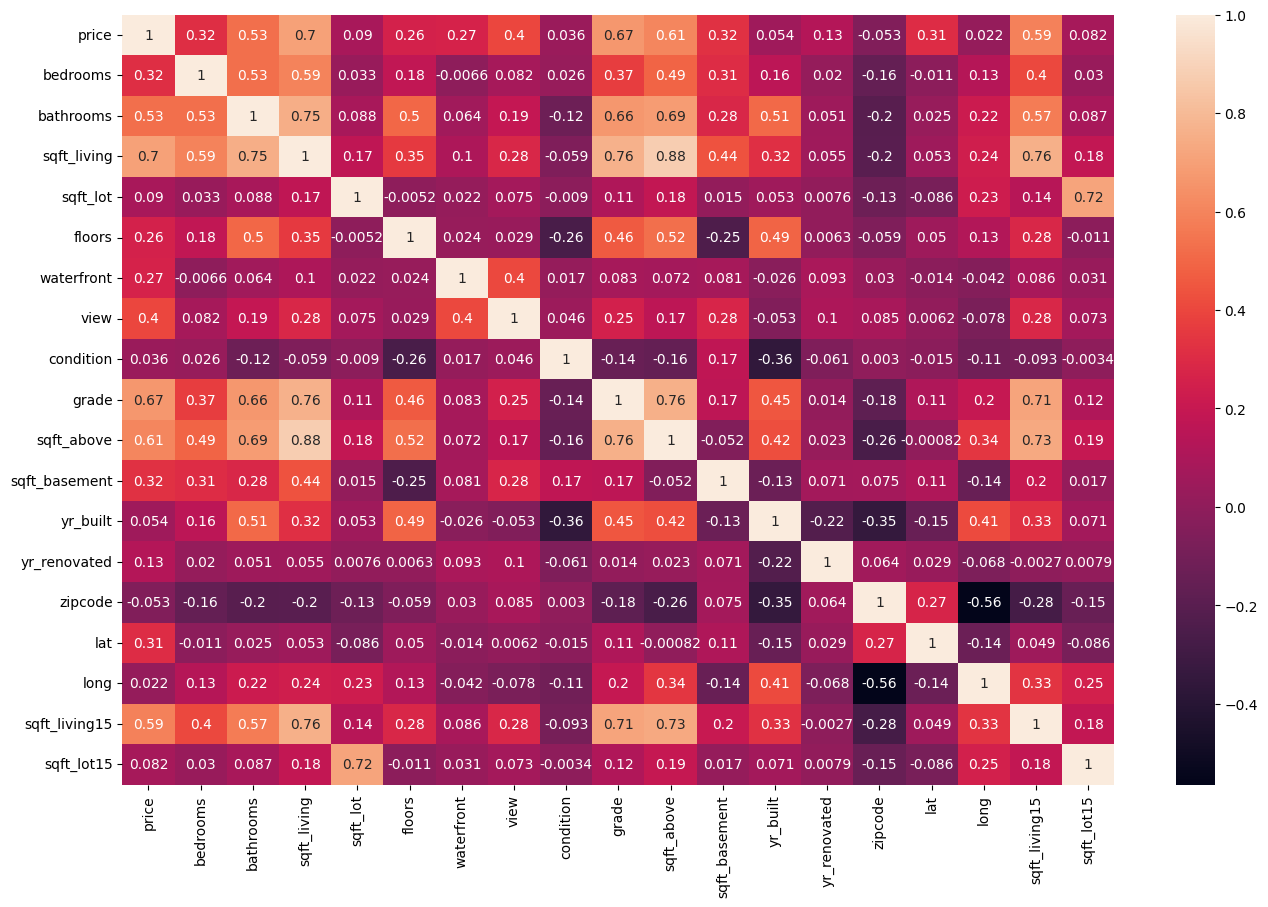

In [21]:
plt.figure(figsize=(16,10))
sns.heatmap(sales[columns].corr(), annot=True)
plt.show()

### Gráfico de linha

Este gráfico é usado para representar graficamente os dados e ajustar um modelo de regressão linear, representado pela linha plotada.

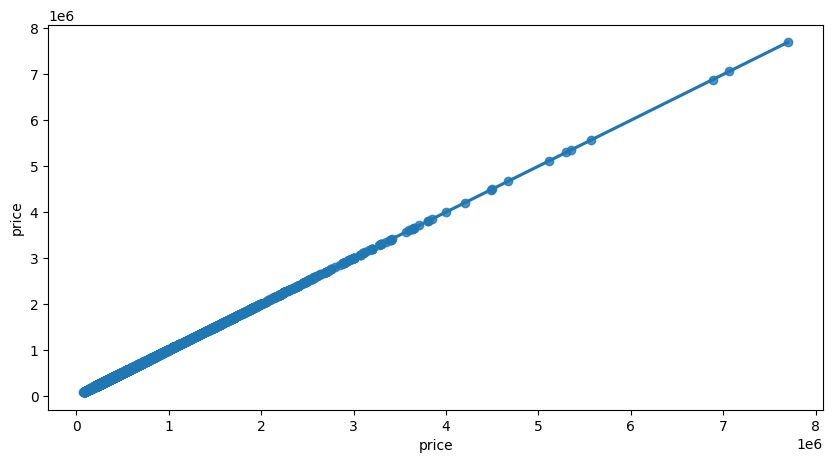

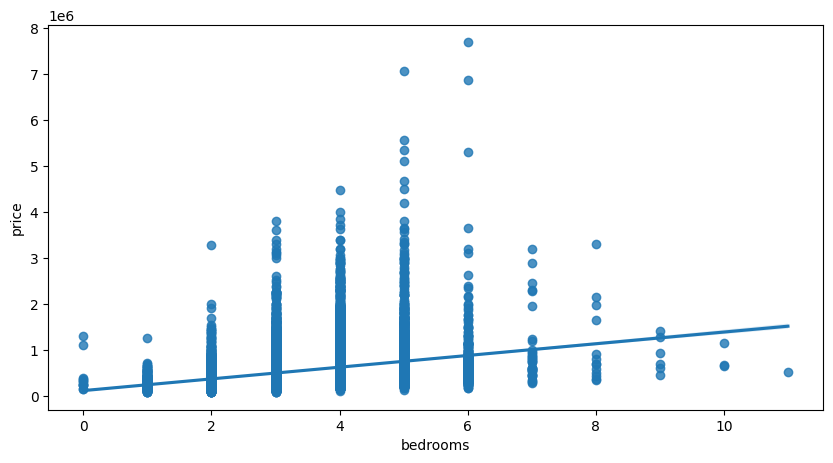

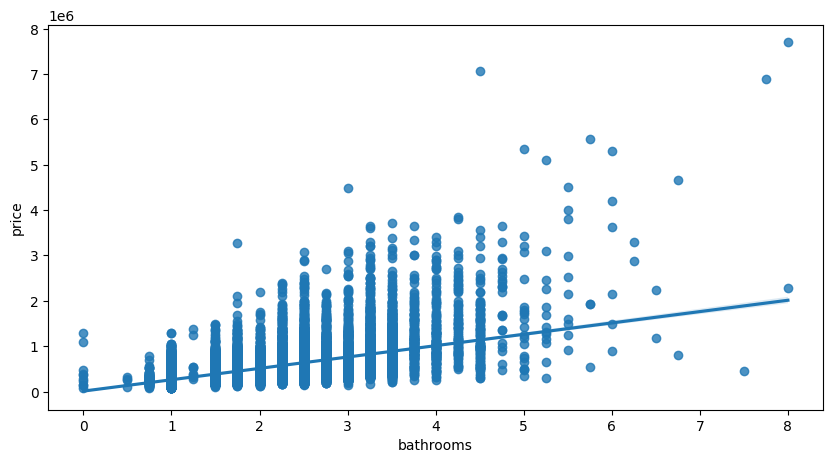

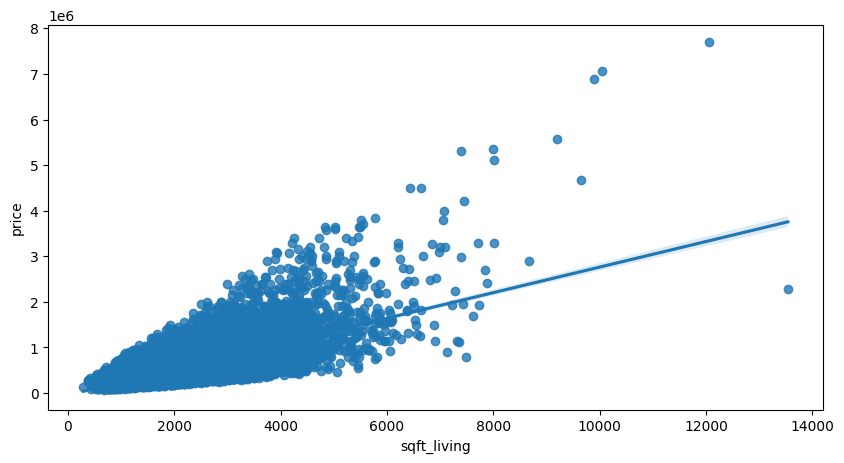

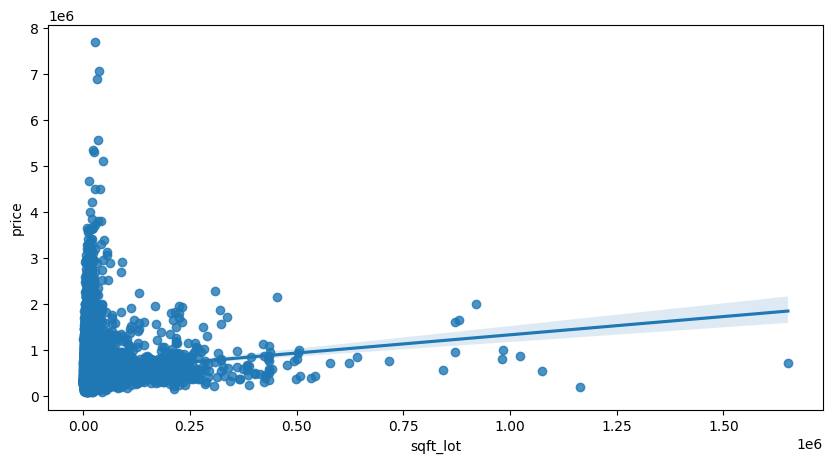

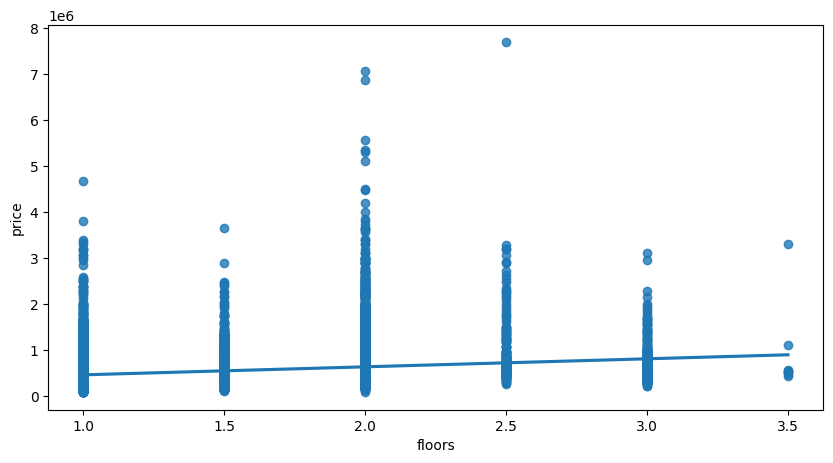

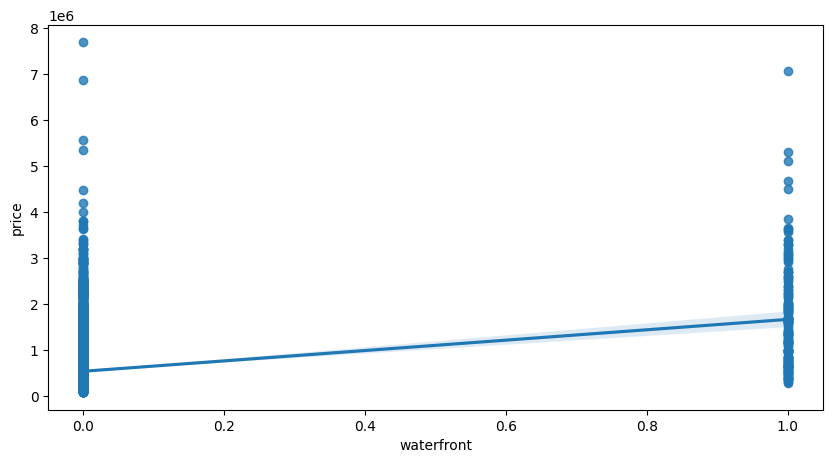

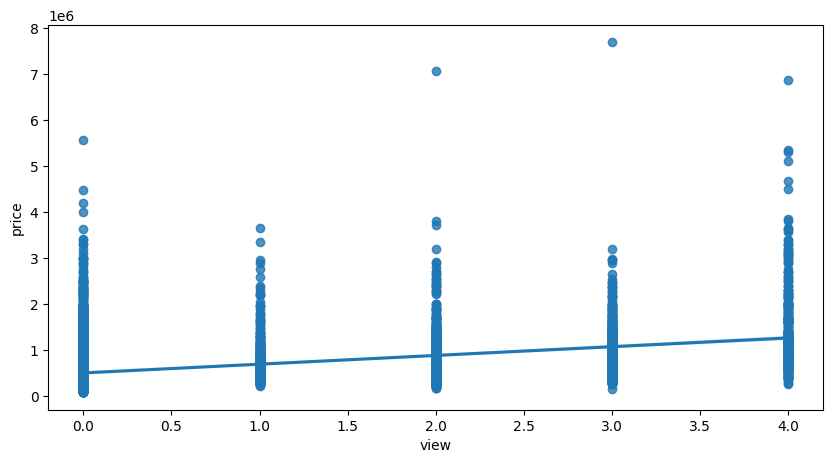

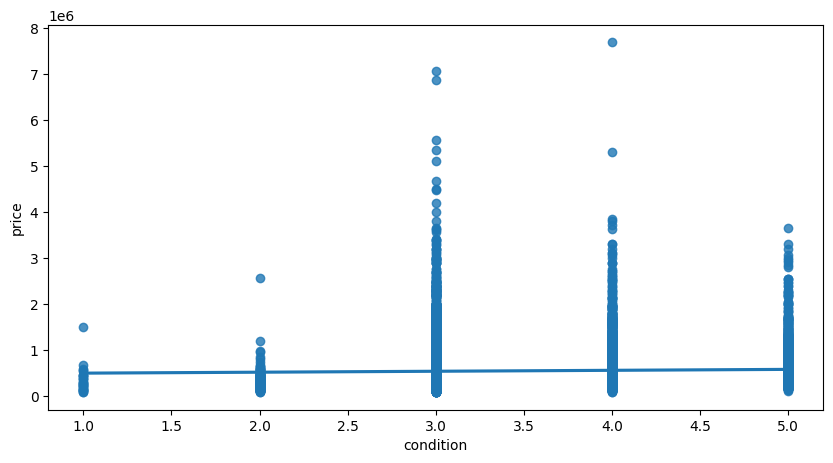

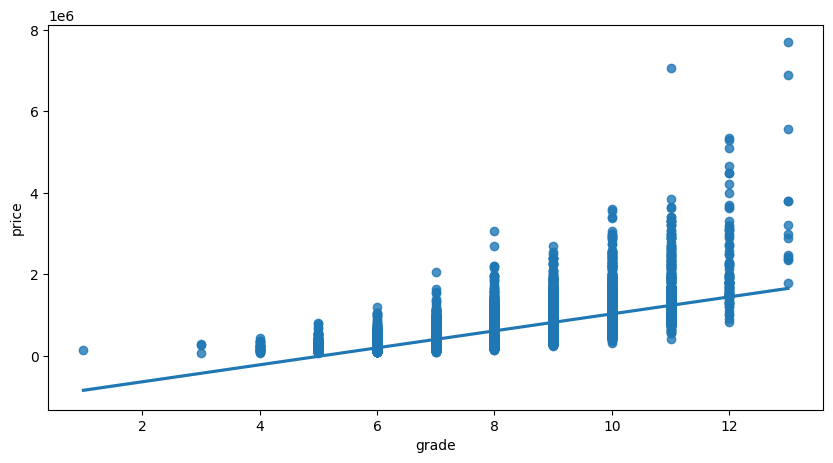

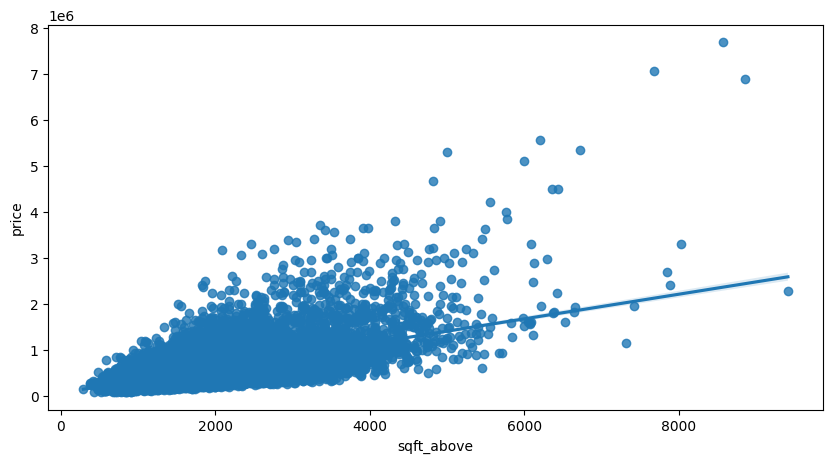

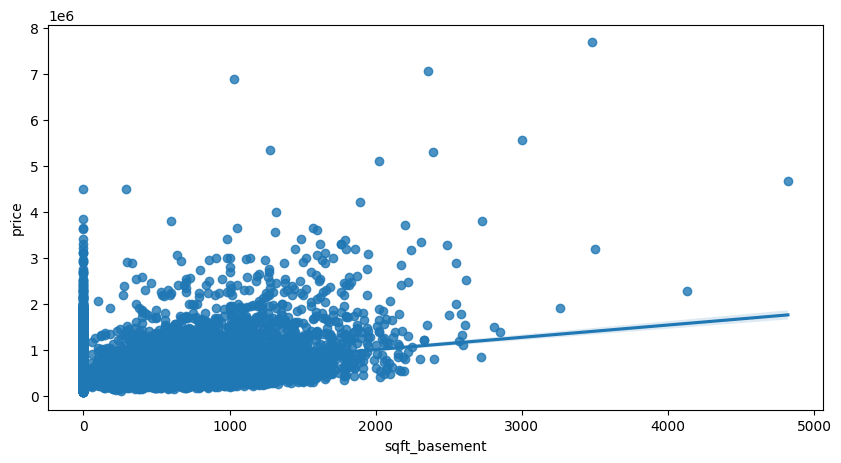

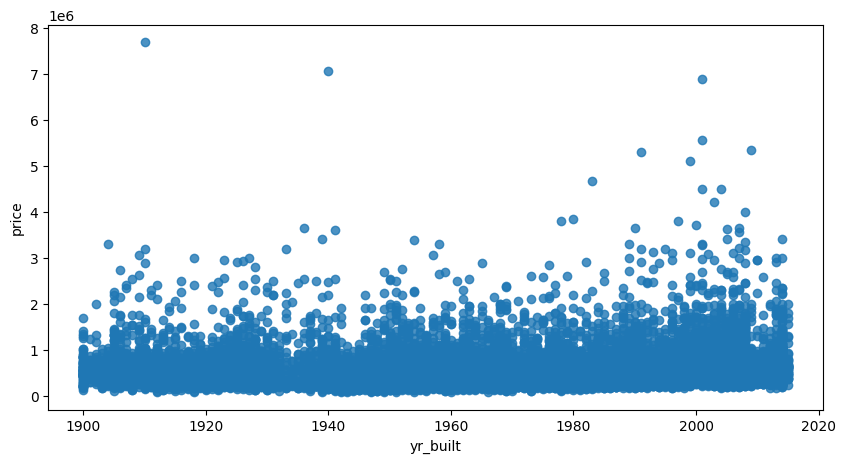

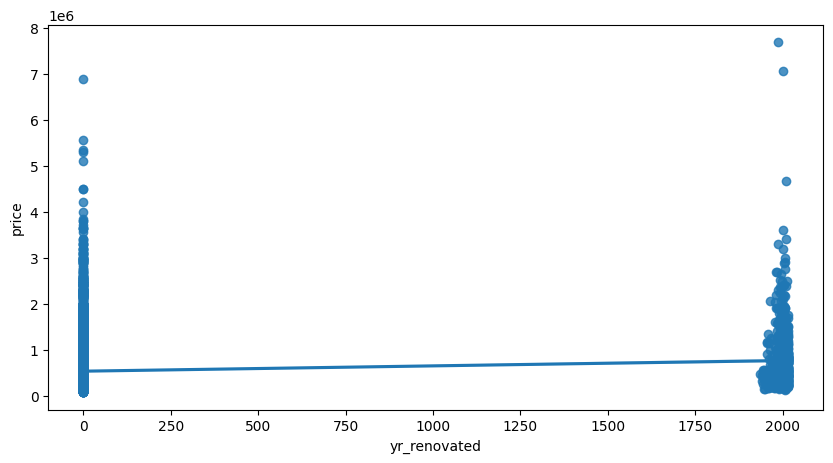

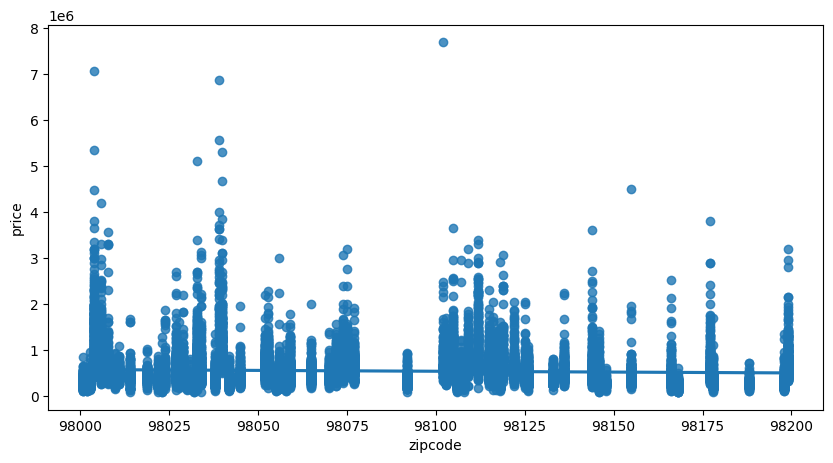

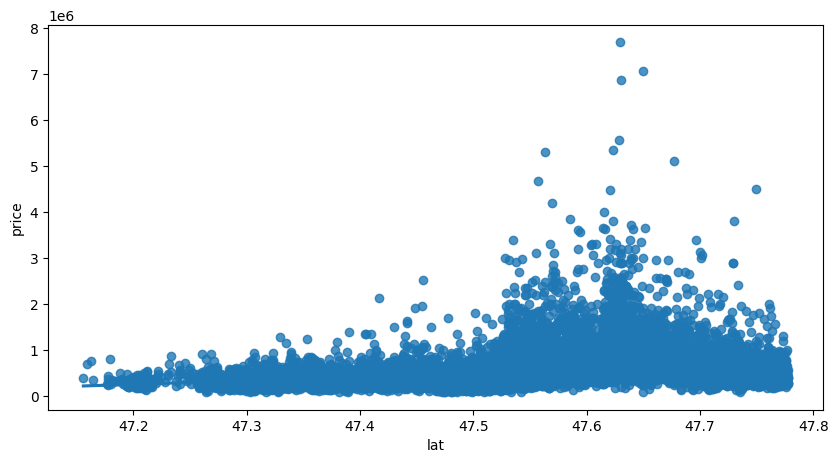

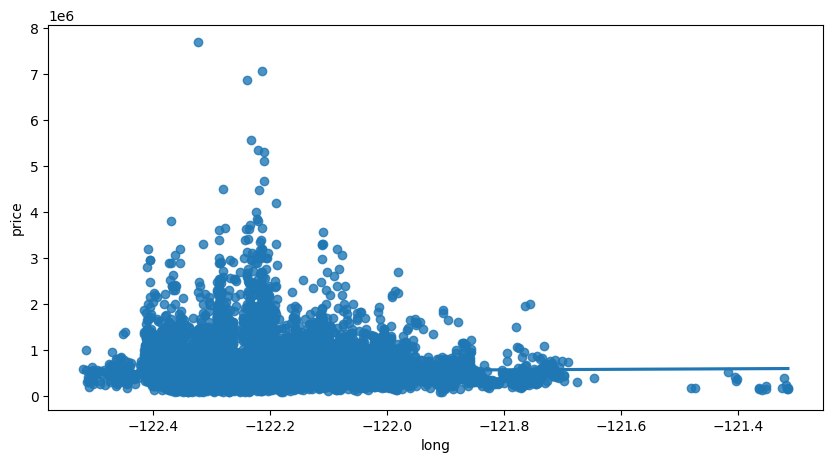

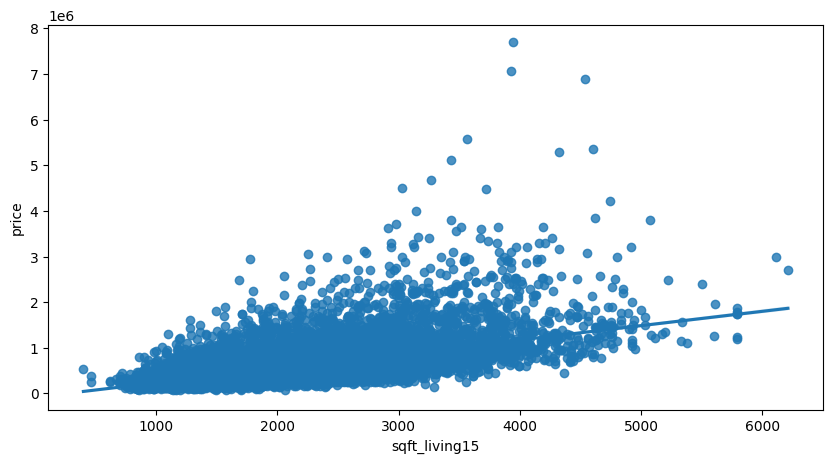

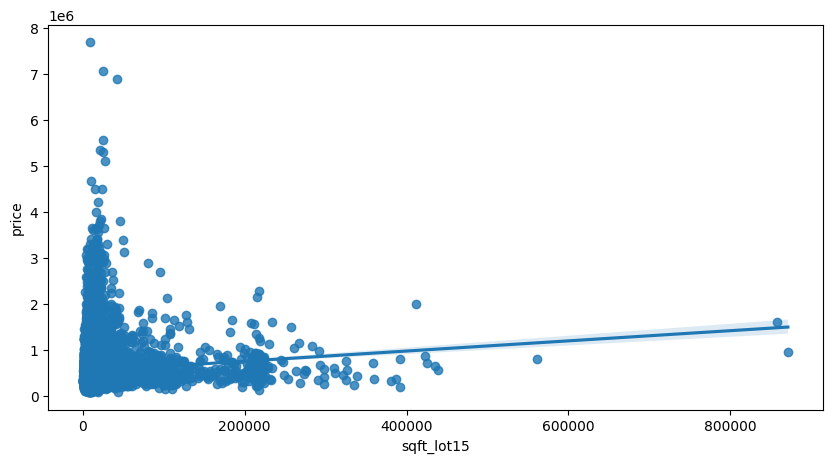

In [22]:
for col in sales[columns]:
    plt.figure(figsize=(10,5))
    sns.regplot(data=sales[columns], x=col, y='price')
    plt.xlabel(col)
    plt.ylabel('price')

### Geração de lista de atributos de interesse
Os comandos abaixo geral duas listas distintas, uma com atributos categóricos e outra com os numéricos. Depois da transformação do atributo data (inicialmente do tipo *object*) para numérico, todos os atributos agora são do tipo numérico.
* A lista com nome **features** contém a descrição literal (nomes) de todos os atributos que serão considerados no modelo de aprendizado que iremos construir.
* A coluna 'price' é removida da lista pois trata-se da variável dependente (alvo).

In [23]:
numerical_features = [i for i in sales.columns if sales[i].dtype != 'O']
categorical_features = [i for i in sales.columns if sales[i].dtype == 'O']
print(numerical_features)

['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


In [24]:
features = sales.columns.tolist()
#features.remove("date")
features.remove("price")

#### Especificação da entrada X e saída y dos modelos de aprendizado

In [25]:
X = sales[features]
y = sales["price"]

#### Transformação de variáveis categóricas em variáveis numéricas

Este transformador é usado normalmente para codificar valores alvo, ou seja y e, não a entrada X.

In [26]:
X['zipcode']

0        98178
1        98125
2        98028
3        98136
4        98074
         ...  
21608    98103
21609    98146
21610    98144
21611    98027
21612    98144
Name: zipcode, Length: 21613, dtype: int64

In [27]:
le = LabelEncoder()
X['zipcode'] = le.fit_transform(X['zipcode'])
print(X['zipcode'])

0        66
1        55
2        16
3        58
4        37
         ..
21608    42
21609    60
21610    59
21611    15
21612    59
Name: zipcode, Length: 21613, dtype: int64


/tmp/ipykernel_36672/2043767384.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['zipcode'] = le.fit_transform(X['zipcode'])


In [28]:
zipcode = pd.DataFrame(X['zipcode'])
zipcode.nunique()

zipcode    70
dtype: int64

In [29]:
ohe = OneHotEncoder()
data = ohe.fit_transform(zipcode)
zipcode = pd.DataFrame(data.toarray(), columns=ohe.get_feature_names_out(), dtype=int)
X.drop(['zipcode'],axis=1,inplace=True)
X = X.join(zipcode)

#X['date']=le.fit_transform(X['date'])

/tmp/ipykernel_36672/2578470971.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(['zipcode'],axis=1,inplace=True)


In [30]:
X

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0             3       1.00         1180      5650     1.0           0     0   
1             3       2.25         2570      7242     2.0           0     0   
2             2       1.00          770     10000     1.0           0     0   
3             4       3.00         1960      5000     1.0           0     0   
4             3       2.00         1680      8080     1.0           0     0   
...         ...        ...          ...       ...     ...         ...   ...   
21608         3       2.50         1530      1131     3.0           0     0   
21609         4       2.50         2310      5813     2.0           0     0   
21610         2       0.75         1020      1350     2.0           0     0   
21611         3       2.50         1600      2388     2.0           0     0   
21612         2       0.75         1020      1076     2.0           0     0   

       condition  grade  sqft_above  ...  zipcode_60  zipcode_61  zipcode_62  \
0              3      7        1180  ...           0           0           0   
1              3      7        2170  ...           0           0           0   
2              3      6         770  ...           0           0           0   
3              5      7        1050  ...           0           0           0   
4              3      8        1680  ...           0           0           0   
...          ...    ...         ...  ...         ...         ...         ...   
21608          3      8        1530  ...           0           0           0   
21609          3      8        2310  ...           1           0           0   
21610          3      7        1020  ...           0           0           0   
21611          3      8        1600  ...           0           0           0   
21612          3      7        1020  ...           0           0           0   

       zipcode_63  zipcode_64  zipcode_65  zipcode_66  zipcode_67  zipcode_68  \
0               0           0           0           1           0           0   
1               0           0           0           0           0           0   
2               0           0           0           0           0           0   
3               0           0           0           0           0           0   
4               0           0           0           0           0           0   
...           ...         ...         ...         ...         ...         ...   
21608           0           0           0           0           0           0   
21609           0           0           0           0           0           0   
21610           0           0           0           0           0           0   
21611           0           0           0           0           0           0   
21612           0           0           0           0           0           0   

       zipcode_69  
0               0  
1               0  
2               0  
3               0  
4               0  
...           ...  
21608           0  
21609           0  
21610           0  
21611           0  
21612           0  

[21613 rows x 87 columns]

#### Substituição dos valores ZERO em Nan
O comando abaixo faz a substituição de valores para que na próxima célula seja realizada a imputação de dados em células que contém o valor Nan.

O imputador Knn faz o trabalho de preencher os valores faltantes.
Veja mais sobre o **KNNImputer** em https://medium.com/@kyawsawhtoon/a-guide-to-knn-imputation-95e2dc496e

In [31]:
X = X.replace({'sqft_basement' : 0, 'yr_renovated' : 0}, np.nan)

In [32]:
imputer = KNNImputer(n_neighbors=5)
X = pd.DataFrame(imputer.fit_transform(X),columns = X.columns)

# Criando os modelos de Regressão

### Medidas de normalização de escala
O dimensionamento de abributos é usado para normalizar os recursos de dados de nosso conjunto de dados para que todos os recursos sejam levados a uma escala comum. Esta é uma etapa de pré-processamento de dados muito importante antes de construir qualquer modelo de aprendizado de máquina; caso contrário, o modelo resultante produzirá resultados desanimadores. As estatísticas robustas mais comuns são o intervalo interquartílico e o desvio absoluto mediano.
* Podem ser utilizados:
    * *StandardScaler*: Padroniza os atributos removendo a média e dimensionando para a variação unitária;
    * *MaxAbsScaler*: Dimensiona cada atributo pelo seu valor absoluto máximo;
    * *MinMaxScaler*: Transforma os atributos dimensionando cada recurso para um determinado intervalo;
    * *RobustScaler*: Dimensiona os atributos usando estatísticas robustas para valores discrepantes (outliers).
    
* O comando abaixo utiliza o ajuste "robusto" de escala sobre os dados

In [33]:
scaler = RobustScaler(with_centering=False, with_scaling=True)

Na célula abaixo é descrita uma função para criar o modelo a partir da definição dos dados de treinamento, da variável independente (atributo alvo) e do algoritmo (neste primeiro momento usaremos o algoritmo de Regressão Linear Múltipla).
* Nesta função usamos a função de quebra do dataset original, optando pelo fracionamento 70% (treinamento)-30% (teste)
* A função retorna tanto o modelo ajustado quanto os dados de treinamento e teste já fracionados (entrada - X e saída - y)

In [34]:
def create_model(data, target, algo, scaler=None):
    if scaler != None:
        X = scaler.fit_transform(data)
    else:
        X = data
    y = target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
    model = algo
    model.fit(X_train, y_train)
    return(model, X_train, X_test, y_train, y_test)

## Modelo de regressão linear sem normalização

In [35]:
model, X_train, X_test, y_train, y_test = create_model(X, y, LinearRegression())

#### Obtendo a predição realizada com os dados de teste
Na célula abaixo, além de estimar a previsão dos preços das casas do dataset de teste, calculamos algumas métricas de erro como:
   * Medida de erro absoluta - **mean absolute error (MAE)**.
   * Erro quadrático médio - **root mean squared error (RMSE)**
   * Coeficiente de determinação - **r squared (R2)**

Para mais detalhes veja em https://www.geeksforgeeks.org/regression-metrics/

In [36]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE : %.3f' % rmse)
print('MAE : %.3f' % mae)
print("SCORE (r2 metric from the own model) :", model.score(X_test,y_test))
print(f'R2 (Test) : {r2_score(y_test,y_pred)}')
print(f'R2 (Training) : {r2_score(y_true=y_train, y_pred=model.predict(X_train))}')

RMSE : 177317.182
MAE : 98860.113
SCORE (r2 metric from the own model) : 0.79090530667718
R2 (Test) : 0.79090530667718
R2 (Training) : 0.8176369265299473


#### Tabela com valores reais e valores previstos para as casas do dataset de teste

In [37]:
real_values = y_test.to_list()
print('Real\t\tPredicted')
for item in range(len(y_pred)):
    print("${0:,.2f}\t${1:,.2f}".format(real_values[item],y_pred[item]))

Real		Predicted
$459,000.00	$556,540.63
$445,000.00	$343,105.44
$1,057,000.00	$721,234.65
$732,350.00	$650,086.04
$235,000.00	$196,040.79
$555,000.00	$684,618.89
$365,000.00	$482,972.37
$685,000.00	$765,710.63
$525,000.00	$572,861.14
$449,950.00	$489,843.25
$280,000.00	$281,193.43
$428,000.00	$454,043.15
$575,000.00	$576,315.49
$313,100.00	$312,662.89
$637,500.00	$582,175.67
$732,000.00	$953,586.75
$400,000.00	$370,039.80
$829,000.00	$782,057.23
$469,500.00	$448,925.09
$537,000.00	$650,032.68
$224,000.00	$257,260.10
$597,500.00	$602,313.92
$1,059,000.00	$1,281,265.54
$720,000.00	$742,472.91
$569,950.00	$516,542.16
$576,925.00	$589,715.52
$285,000.00	$387,568.67
$235,000.00	$236,524.17
$280,000.00	$413,813.81
$440,000.00	$445,149.95
$810,000.00	$932,555.03
$625,000.00	$671,517.20
$218,500.00	$199,549.72
$1,264,000.00	$1,448,671.29
$415,000.00	$465,261.92
$230,000.00	$146,728.51
$246,900.00	$222,443.34
$282,000.00	$360,784.07
$400,000.00	$362,458.64
$638,250.00	$634,797.01
$470,000.00	$3

### Validação Cruzada
* É uma técnica para avaliar a capacidade de generalização de um modelo, a partir de um conjunto de dados.
* É o particionamento do conjunto de dados em subconjuntos mutuamente exclusivos, e posteriormente, o uso de alguns destes subconjuntos para a estimação dos parâmetros do modelo (dados de treinamento), sendo os subconjuntos restantes (dados de validação ou de teste) empregados na validação do modelo.

In [38]:
cv = StratifiedKFold(n_splits=10)
n_scores = cross_val_score(model, X, y, cv=cv, scoring='r2')
print('R squared: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

/home/codespace/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


R squared: 0.806 (0.013)


## Modelo de regressão linear com normalização

In [39]:
model, X_train, X_test, y_train, y_test = create_model(X, y, LinearRegression(), scaler)

In [40]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE : %.3f' % rmse)
print(f'MAE: %.3f' % mae)
print("SCORE (r2 metric from the own model) :", model.score(X_test,y_test))
print(f'R2 (Test) : {r2_score(y_test,y_pred)}')
print('R2 (Training) : {}'.format(r2_score(y_true=y_train, y_pred=model.predict(X_train))))

RMSE : 177317.333
MAE: 98860.609
SCORE (r2 metric from the own model) : 0.790904950984013
R2 (Test) : 0.790904950984013
R2 (Training) : 0.8176369162610911


#### Validação Cruzada

In [41]:
cv = StratifiedKFold(n_splits=10)
n_scores = cross_val_score(model, X_train, y_train, scoring='r2', cv=cv)
print("Model Score : ", model.score(X_test,y_test))
print('R squared: %.3f' % (mean(n_scores)))

/home/codespace/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Model Score :  0.790904950984013
R squared: 0.814


### Regressão usando algoritmo de Árvore de Decisão

Este algoritmo usa uma árvore de decisão (como um modelo preditivo) para, a partir de observações sobre um item (representado nos ramos), chegar às conclusões sobre o valor alvo do item (representado nas folhas). 

Os modelos de árvore em que a variável de destino pode assumir um conjunto discreto de valores são chamados de 

* **Árvores de classificação**: nessas estruturas de árvore, as folhas representam rótulos de classe e os ramos representam conjunções de características que levam a esses rótulos de classe. 
* As árvores de decisão em que a variável de destino pode assumir valores contínuos (normalmente números reais) são chamadas de **árvores de regressão**.

Você pode encontrar mais informações em: https://www.geeksforgeeks.org/python-decision-tree-regression-using-sklearn/ (visão prática) e https://saedsayad.com/decision_tree_reg.htm (visão teórica)

In [42]:
# DecisionTreeRegressor
regressor = DecisionTreeRegressor()
model, X_train, X_test, y_train, y_test = create_model(X, y, regressor)

y_pred=model.predict(X_test)
print(f'MAE is : {mean_absolute_error(y_test,y_pred)}')
print(f'R2 (Test) is : {r2_score(y_test,y_pred)}')
print(f'R2 (Training) : {r2_score(y_true=y_train, y_pred=model.predict(X_train))}')

MAE is : 102798.09827562036
R2 (Test) is : 0.7550966303647982
R2 (Training) : 0.9994272263917509


### Regressão usando algoritmo de Floresta Randômica

Random Forest(Floresta randômica) é uma técnica **ensemble** (conjunta) capaz de realizar tarefas de regressão e classificação com o uso de múltiplas árvores de decisão e uma técnica chamada *Bootstrap* e *Aggregation*, comumente conhecida como **Bagging** . A ideia básica por trás disso é combinar múltiplas árvores de decisão para determinar o resultado final, em vez de depender de árvores de decisão individuais.

Este algoritmo é um metaestimador que ajusta uma série de árvores de decisão de classificação em várias subamostras do conjunto de dados e usa a média para melhorar a precisão preditiva e controlar o ajuste excessivo. 

Veja mais em https://www.geeksforgeeks.org/random-forest-regression-in-python/

In [43]:
# RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=200,random_state=10,max_samples=0.9,max_features=0.80,max_depth=30)
model, X_train, X_test, y_train, y_test = create_model(X, y, regressor, scaler)

y_pred=model.predict(X_test)

print(f'MAE is : {mean_absolute_error(y_test,y_pred)}')
print(f'R2 (Test) is : {r2_score(y_test,y_pred)}')
print(f'R2 (Training) : {r2_score(y_true=y_train, y_pred=model.predict(X_train))}')

MAE is : 71388.93693243572
R2 (Test) is : 0.8636895407361429
R2 (Training) : 0.9791935500674799


In [44]:
real_values = y_test.to_list()
print('Real\t\tPredicted')
for item in range(len(y_pred)):
    print("${0:,.2f}\t${1:,.2f}".format(real_values[item],y_pred[item]))

Real		Predicted
$459,000.00	$444,475.19
$445,000.00	$418,007.10
$1,057,000.00	$689,019.13
$732,350.00	$692,266.36
$235,000.00	$246,748.73
$555,000.00	$572,244.56
$365,000.00	$367,892.71
$685,000.00	$685,875.15
$525,000.00	$582,971.00
$449,950.00	$468,253.74
$280,000.00	$389,882.70
$428,000.00	$436,742.70
$575,000.00	$537,540.03
$313,100.00	$291,070.67
$637,500.00	$604,989.01
$732,000.00	$978,605.90
$400,000.00	$412,548.00
$829,000.00	$812,861.66
$469,500.00	$446,481.95
$537,000.00	$579,029.17
$224,000.00	$236,285.83
$597,500.00	$606,531.70
$1,059,000.00	$1,159,811.90
$720,000.00	$655,748.73
$569,950.00	$566,449.34
$576,925.00	$541,995.12
$285,000.00	$337,659.93
$235,000.00	$317,260.21
$280,000.00	$309,247.64
$440,000.00	$389,357.84
$810,000.00	$765,380.80
$625,000.00	$668,171.99
$218,500.00	$288,498.51
$1,264,000.00	$1,350,213.47
$415,000.00	$460,966.61
$230,000.00	$218,078.80
$246,900.00	$211,583.29
$282,000.00	$351,973.11
$400,000.00	$418,421.79
$638,250.00	$649,434.60
$470,000.00	$4

### Regressão usando algoritmo XGBoost

Veja mais em https://www.geeksforgeeks.org/xgboost-for-regression/

In [45]:
#ct = ColumnTransformer(transformers=[('zipcode', OneHotEncoder(), [X.columns.tolist().index('zipcode')])],
#                      remainder='passthrough')
#X = ct.fit_transform(X)

In [46]:
# XGBoostRegressor
regressor = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=10000, max_depth=3, colsample_bytree=.5,
                          learning_rate=0.001, random_state=0, subsample=.5, n_jobs=-1, eval_metric='mae',
                          verbosity=0)
model, X_train, X_test, y_train, y_test = create_model(X, y, regressor)

In [47]:
y_pred=model.predict(X_test)

print(f'MAE is : {mean_absolute_error(y_test,y_pred)}')
print(f'R2 (Test) is : {r2_score(y_test,y_pred)}')
print(f'R2 (Training) : {r2_score(y_true=y_train, y_pred=model.predict(X_train))}')

MAE is : 77851.51604119936
R2 (Test) is : 0.8581262231671221
R2 (Training) : 0.9013603613494228


### Regressão usando algoritmo CatBoost

Veja mais em https://www.geeksforgeeks.org/catboost-ml/

In [48]:
regressor = CatBoostRegressor(loss_function='RMSE', iterations=1000, depth=3, colsample_bylevel=.4,
                             eval_metric='MAE', subsample=.5, random_state=0, verbose=0, eta=.1)
model, X_train, X_test, y_train, y_test = create_model(X, y, regressor)

NameError: name 'CatBoostRegressor' is not defined

In [ ]:
y_pred=model.predict(X_test)

print(f'MAE is : {mean_absolute_error(y_test,y_pred)}')
print(f'R2 (Test) is : {r2_score(y_test,y_pred)}')
print(f'R2 (Training) : {r2_score(y_true=y_train, y_pred=model.predict(X_train))}')

MAE is : 69137.70699301454
R2 (Test) is : 0.8861165835242077
R2 (Training) : 0.9394828097576579


In [ ]:
cv = StratifiedKFold(n_splits=10)
n_scores = cross_val_score(model, X, y, cv=cv, scoring='r2')
print('R squared: %.3f' % (n_scores.mean()))

/home/gustavo/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


R squared: 0.898


In [ ]:
real_values = y_test.to_list()
print('Real\t\tPredicted')
for item in range(len(y_pred)):
    print("${0:,.2f}\t${1:,.2f}".format(real_values[item],y_pred[item]))

Real		Predicted
$459,000.00	$475,238.04
$445,000.00	$408,112.87
$1,057,000.00	$685,598.69
$732,350.00	$718,784.20
$235,000.00	$236,013.68
$555,000.00	$622,306.79
$365,000.00	$372,949.15
$685,000.00	$694,248.12
$525,000.00	$588,070.42
$449,950.00	$469,390.00
$280,000.00	$405,720.04
$428,000.00	$447,815.54
$575,000.00	$523,134.08
$313,100.00	$303,383.91
$637,500.00	$558,552.18
$732,000.00	$1,066,704.22
$400,000.00	$401,663.71
$829,000.00	$766,473.76
$469,500.00	$456,444.43
$537,000.00	$582,689.21
$224,000.00	$228,175.83
$597,500.00	$596,073.09
$1,059,000.00	$1,168,199.11
$720,000.00	$616,879.93
$569,950.00	$582,154.12
$576,925.00	$539,322.40
$285,000.00	$332,794.81
$235,000.00	$313,225.26
$280,000.00	$329,708.57
$440,000.00	$430,768.61
$810,000.00	$821,283.85
$625,000.00	$649,490.63
$218,500.00	$271,419.62
$1,264,000.00	$1,384,068.52
$415,000.00	$458,924.43
$230,000.00	$210,820.86
$246,900.00	$228,281.75
$282,000.00	$356,715.45
$400,000.00	$422,600.06
$638,250.00	$641,518.45
$470,000.00	

## Otimização de hiperparâmetros para encontrar o melhor modelo de regressão

Para saber mais sobre a otimização de ajuste dos hiperparâmetros de um modelo veja em https://www.mygreatlearning.com/blog/gridsearchcv/

In [ ]:
model = CatBoostRegressor()
parameters = {'depth'         : [3,6,8,10],
  'learning_rate' : [0.001, 0.01, 0.05, 0.1],
  'iterations'    : [30, 50, 100, 1000]
 }
grid = GridSearchCV(estimator=model, param_grid = parameters, cv = 2, n_jobs=-1)
grid.fit(X_train, y_train)    

# Results from Grid Search
print("\n========================================================")
print(" Results from Grid Search " )
print("========================================================")    

print("\n The best estimator (model) across ALL searched params:\n", grid.best_estimator_)

print("\n The best score across ALL searched params:\n", grid.best_score_)

print("\n The best parameters across ALL searched params:\n", grid.best_params_)

0:	learn: 348534.5317442	total: 49.5ms	remaining: 2.43s
1:	learn: 346689.6634223	total: 54.3ms	remaining: 1.3s
2:	learn: 344921.0567179	total: 65.8ms	remaining: 1.03s
3:	learn: 343171.0416097	total: 81.9ms	remaining: 942ms
4:	learn: 341375.6001000	total: 119ms	remaining: 1.07s
5:	learn: 339589.4105918	total: 122ms	remaining: 892ms
6:	learn: 337929.5752744	total: 150ms	remaining: 922ms
7:	learn: 336319.8937644	total: 152ms	remaining: 796ms
8:	learn: 334693.9996674	total: 159ms	remaining: 724ms
9:	learn: 333083.1829050	total: 166ms	remaining: 662ms
10:	learn: 331478.7024119	total: 168ms	remaining: 595ms
11:	learn: 329906.8679525	total: 175ms	remaining: 553ms
12:	learn: 328269.1563263	total: 178ms	remaining: 507ms
13:	learn: 326680.8079368	total: 180ms	remaining: 464ms
14:	learn: 325078.6250418	total: 184ms	remaining: 429ms
15:	learn: 323529.6011165	total: 186ms	remaining: 396ms
16:	learn: 322011.1606214	total: 189ms	remaining: 367ms
17:	learn: 320491.5270442	total: 196ms	remaining: 349ms

In [ ]:
model = grid.best_estimator_

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
print(f'MAE is : {mean_absolute_error(y_test,y_pred)}')
print(f'R2 (Test) is : {r2_score(y_test,y_pred)}')
print(f'R2 (Training) : {r2_score(y_true=y_train, y_pred=model.predict(X_train))}')

MAE is : 66419.67894773775
R2 (Test) is : 0.8805405199320864
R2 (Training) : 0.9585903376079983


In [ ]:
real_values = y_test.to_list()
print('Real\t\tPredicted')
for item in range(len(y_pred)):
    print("${0:,.2f}\t${1:,.2f}".format(real_values[item],y_pred[item]))

Real		Predicted
$459,000.00	$473,658.41
$445,000.00	$400,995.00
$1,057,000.00	$703,254.23
$732,350.00	$696,962.03
$235,000.00	$232,935.43
$555,000.00	$610,476.94
$365,000.00	$388,595.96
$685,000.00	$696,546.97
$525,000.00	$587,707.27
$449,950.00	$475,316.87
$280,000.00	$377,585.65
$428,000.00	$455,418.73
$575,000.00	$524,473.10
$313,100.00	$289,587.03
$637,500.00	$588,910.12
$732,000.00	$985,075.16
$400,000.00	$403,314.46
$829,000.00	$775,529.88
$469,500.00	$461,229.39
$537,000.00	$596,206.64
$224,000.00	$228,330.26
$597,500.00	$612,351.52
$1,059,000.00	$1,100,075.14
$720,000.00	$633,977.80
$569,950.00	$605,088.52
$576,925.00	$531,285.84
$285,000.00	$312,441.80
$235,000.00	$323,467.70
$280,000.00	$320,505.31
$440,000.00	$405,206.40
$810,000.00	$842,458.42
$625,000.00	$635,392.36
$218,500.00	$268,936.88
$1,264,000.00	$1,446,653.00
$415,000.00	$448,332.91
$230,000.00	$210,394.61
$246,900.00	$235,093.41
$282,000.00	$369,894.43
$400,000.00	$422,061.54
$638,250.00	$649,759.65
$470,000.00	$4